___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# 👋 High.

Intro: You are expected to deploy model using the data provided from scratch. 

- Conduct EDA process to understand the data
- Implement data modelling with ML algorithms (not all of them, only a few you can try)
- Find best performing algorithmus model 
- Built best performing final model 
- Deploy the final model using streamlit on EC2 --> 

# Building a Price Prediction App with Streamlit involves the following main steps:

1. **Data Preprocessing**:
   1. Import Modules, Load Data and Data Review
   2. Handle missing values.
   3. Convert categorical variables into numerical ones (e.g., via one-hot encoding or label encoding).
   4. Scale or normalize numerical features, if necessary.
   5. Split the dataset into training and testing sets.


2. **Model Development**:
    - Choose a regression algorithm (Linear Regression, Decision Trees, Random Forest, Gradient Boosting, etc.).
      - Unsupervised Learning
    - Train the model on the training dataset.
    - Evaluate the model's performance on the testing dataset.
      - You can measure the success of your models with regression evaluation metrics as well as with cross validation method.
    - Fine-tune the model if necessary.
  

3. **Deployment**:
    - Deploy the Streamlit app on AWS

# 1. Data Preprocessing:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

from scipy.stats import skew

from sklearn.model_selection import cross_validate

np.set_printoptions(suppress=True)
plt.rcParams["figure.figsize"] = (7, 4)
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 1000)
pd.options.display.float_format = "{:.3f}".format

In [2]:
#!pip install -U scikit-learn

In [3]:
np.__version__

'1.22.4'

In [4]:
import sklearn

sklearn.__version__

'1.3.0'

In [5]:
# Reading the uploaded file
df = pd.read_csv('final_scout_not_dummy.csv')

# Displaying the first few rows of the file to understand its structure
df.head()

make_model body_type  price               vat        km  Type     Fuel  \
0    Audi A1    Sedans  15770    VAT deductible 56013.000  Used   Diesel   
1    Audi A1    Sedans  14500  Price negotiable 80000.000  Used  Benzine   
2    Audi A1    Sedans  14640    VAT deductible 83450.000  Used   Diesel   
3    Audi A1    Sedans  14500    VAT deductible 73000.000  Used   Diesel   
4    Audi A1    Sedans  16790    VAT deductible 16200.000  Used   Diesel   

   Gears                                Comfort_Convenience  \
0  7.000  Air conditioning,Armrest,Automatic climate con...   
1  7.000  Air conditioning,Automatic climate control,Hil...   
2  7.000  Air conditioning,Cruise control,Electrical sid...   
3  6.000  Air suspension,Armrest,Auxiliary heating,Elect...   
4  7.000  Air conditioning,Armrest,Automatic climate con...   

                                 Entertainment_Media  \
0  Bluetooth,Hands-free equipment,On-board comput...   
1  Bluetooth,Hands-free equipment,On-board comput...   
2                              MP3,On-board computer   
3  Bluetooth,CD player,Hands-free equipment,MP3,O...   
4  Bluetooth,CD player,Hands-free equipment,MP3,O...   

                                              Extras  \
0     Alloy wheels,Catalytic Converter,Voice Control   
1  Alloy wheels,Sport seats,Sport suspension,Voic...   
2                         Alloy wheels,Voice Control   
3             Alloy wheels,Sport seats,Voice Control   
4  Alloy wheels,Sport package,Sport suspension,Vo...   

                                     Safety_Security   age  Previous_Owners  \
0  ABS,Central door lock,Daytime running lights,D... 3.000            2.000   
1  ABS,Central door lock,Central door lock with r... 2.000            1.000   
2  ABS,Central door lock,Daytime running lights,D... 3.000            1.000   
3  ABS,Alarm system,Central door lock with remote... 3.000            1.000   
4  ABS,Central door lock,Driver-side airbag,Elect... 3.000            1.000   

    hp_kW  Inspection_new Paint_Type Upholstery_type Gearing_Type  \
0  66.000               1   Metallic           Cloth    Automatic   
1 141.000               0   Metallic           Cloth    Automatic   
2  85.000               0   Metallic           Cloth    Automatic   
3  66.000               0   Metallic           Cloth    Automatic   
4  66.000               1   Metallic           Cloth    Automatic   

   Displacement_cc  Weight_kg Drive_chain  cons_comb  
0         1422.000   1220.000       front      3.800  
1         1798.000   1255.000       front      5.600  
2         1598.000   1135.000       front      3.800  
3         1422.000   1195.000       front      3.800  
4         1422.000   1135.000       front      4.100

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [7]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Fuel',
       'Gears', 'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg', 'Drive_chain', 'cons_comb'],
      dtype='object')

In [8]:
df.describe()

price         km     Gears       age  Previous_Owners     hp_kW  \
count 15915.000  15915.000 15915.000 15915.000        15915.000 15915.000   
mean  18024.381  32089.996     5.937     1.390            1.043    88.499   
std    7381.679  36977.215     0.705     1.121            0.339    26.674   
min    4950.000      0.000     5.000     0.000            0.000    40.000   
25%   12850.000   1920.500     5.000     0.000            1.000    66.000   
50%   16900.000  20413.000     6.000     1.000            1.000    85.000   
75%   21900.000  46900.000     6.000     2.000            1.000   103.000   
max   74600.000 317000.000     8.000     3.000            4.000   294.000   

       Inspection_new  Displacement_cc  Weight_kg  cons_comb  
count       15915.000        15915.000  15915.000  15915.000  
mean            0.247         1428.662   1337.701      4.832  
std             0.431          275.804    199.682      0.868  
min             0.000          890.000    840.000      3.000  
25%             0.000         1229.000   1165.000      4.100  
50%             0.000         1461.000   1295.000      4.800  
75%             0.000         1598.000   1472.000      5.400  
max             1.000         2967.000   2471.000      9.100

In [9]:
df.duplicated().sum()

1673

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.make_model.value_counts()

make_model
Audi A3           2758
Opel Insignia     2417
Audi A1           2377
Opel Astra        2305
Opel Corsa        1994
Renault Clio      1486
Renault Espace     884
Renault Duster      20
Audi A2              1
Name: count, dtype: int64

In [13]:
drop_model = df.make_model.value_counts()[df.make_model.value_counts() <= 100].index
drop_model

# We list the models with 100 or less observations.
# We will drop the observations of the models in this list from our data.

Index(['Renault Duster', 'Audi A2'], dtype='object', name='make_model')

In [14]:
for i in drop_model:
    drop_index = df[df["make_model"] == i].index
    df.drop(index=drop_index, inplace=True)

df.reset_index(drop=True, inplace=True)

In [15]:
df.make_model.value_counts()

make_model
Audi A3           2758
Opel Insignia     2417
Audi A1           2377
Opel Astra        2305
Opel Corsa        1994
Renault Clio      1486
Renault Espace     884
Name: count, dtype: int64

## Feature Engineering

In [16]:
df.columns.tolist()

['make_model',
 'body_type',
 'price',
 'vat',
 'km',
 'Type',
 'Fuel',
 'Gears',
 'Comfort_Convenience',
 'Entertainment_Media',
 'Extras',
 'Safety_Security',
 'age',
 'Previous_Owners',
 'hp_kW',
 'Inspection_new',
 'Paint_Type',
 'Upholstery_type',
 'Gearing_Type',
 'Displacement_cc',
 'Weight_kg',
 'Drive_chain',
 'cons_comb']

In [17]:
df.head(2).T

0  \
make_model                                                     Audi A1   
body_type                                                       Sedans   
price                                                            15770   
vat                                                     VAT deductible   
km                                                           56013.000   
Type                                                              Used   
Fuel                                                            Diesel   
Gears                                                            7.000   
Comfort_Convenience  Air conditioning,Armrest,Automatic climate con...   
Entertainment_Media  Bluetooth,Hands-free equipment,On-board comput...   
Extras                  Alloy wheels,Catalytic Converter,Voice Control   
Safety_Security      ABS,Central door lock,Daytime running lights,D...   
age                                                              3.000   
Previous_Owners                                                  2.000   
hp_kW                                                           66.000   
Inspection_new                                                       1   
Paint_Type                                                    Metallic   
Upholstery_type                                                  Cloth   
Gearing_Type                                                 Automatic   
Displacement_cc                                               1422.000   
Weight_kg                                                     1220.000   
Drive_chain                                                      front   
cons_comb                                                        3.800   

                                                                     1  
make_model                                                     Audi A1  
body_type                                                       Sedans  
price                                                            14500  
vat                                                   Price negotiable  
km                                                           80000.000  
Type                                                              Used  
Fuel                                                           Benzine  
Gears                                                            7.000  
Comfort_Convenience  Air conditioning,Automatic climate control,Hil...  
Entertainment_Media  Bluetooth,Hands-free equipment,On-board comput...  
Extras               Alloy wheels,Sport seats,Sport suspension,Voic...  
Safety_Security      ABS,Central door lock,Central door lock with r...  
age                                                              2.000  
Previous_Owners                                                  1.000  
hp_kW                                                          141.000  
Inspection_new                                                       0  
Paint_Type                                                    Metallic  
Upholstery_type                                                  Cloth  
Gearing_Type                                                 Automatic  
Displacement_cc                                               1798.000  
Weight_kg                                                     1255.000  
Drive_chain                                                      front  
cons_comb                                                        5.600

In [18]:
df.Comfort_Convenience.value_counts()

Comfort_Convenience
Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                                                                                                                                                                   312
Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical side mirrors,Leather steering wheel,Light sensor,Lumbar support,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Start-stop system                                                                                                                                                   177
Ai

In [19]:
df.Comfort_Convenience.value_counts()

Comfort_Convenience
Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                                                                                                                                                                   312
Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical side mirrors,Leather steering wheel,Light sensor,Lumbar support,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Start-stop system                                                                                                                                                   177
Ai

In [20]:
df_object = df.select_dtypes(include="object").head()
df_object

make_model body_type               vat  Type     Fuel  \
0    Audi A1    Sedans    VAT deductible  Used   Diesel   
1    Audi A1    Sedans  Price negotiable  Used  Benzine   
2    Audi A1    Sedans    VAT deductible  Used   Diesel   
3    Audi A1    Sedans    VAT deductible  Used   Diesel   
4    Audi A1    Sedans    VAT deductible  Used   Diesel   

                                 Comfort_Convenience  \
0  Air conditioning,Armrest,Automatic climate con...   
1  Air conditioning,Automatic climate control,Hil...   
2  Air conditioning,Cruise control,Electrical sid...   
3  Air suspension,Armrest,Auxiliary heating,Elect...   
4  Air conditioning,Armrest,Automatic climate con...   

                                 Entertainment_Media  \
0  Bluetooth,Hands-free equipment,On-board comput...   
1  Bluetooth,Hands-free equipment,On-board comput...   
2                              MP3,On-board computer   
3  Bluetooth,CD player,Hands-free equipment,MP3,O...   
4  Bluetooth,CD player,Hands-free equipment,MP3,O...   

                                              Extras  \
0     Alloy wheels,Catalytic Converter,Voice Control   
1  Alloy wheels,Sport seats,Sport suspension,Voic...   
2                         Alloy wheels,Voice Control   
3             Alloy wheels,Sport seats,Voice Control   
4  Alloy wheels,Sport package,Sport suspension,Vo...   

                                     Safety_Security Paint_Type  \
0  ABS,Central door lock,Daytime running lights,D...   Metallic   
1  ABS,Central door lock,Central door lock with r...   Metallic   
2  ABS,Central door lock,Daytime running lights,D...   Metallic   
3  ABS,Alarm system,Central door lock with remote...   Metallic   
4  ABS,Central door lock,Driver-side airbag,Elect...   Metallic   

  Upholstery_type Gearing_Type Drive_chain  
0           Cloth    Automatic       front  
1           Cloth    Automatic       front  
2           Cloth    Automatic       front  
3           Cloth    Automatic       front  
4           Cloth    Automatic       front

In [21]:
for col in df_object:
    print(f"{col:<30}:", df[col].nunique())

make_model                    : 7
body_type                     : 8
vat                           : 2
Type                          : 5
Fuel                          : 4
Comfort_Convenience           : 6195
Entertainment_Media           : 346
Extras                        : 659
Safety_Security               : 4441
Paint_Type                    : 3
Upholstery_type               : 2
Gearing_Type                  : 3
Drive_chain                   : 3


### Converting Extras Feature from object to numerical

In [22]:
df.Extras.sample(10)

6067                                          Alloy wheels
14044                                         Alloy wheels
1435     Alloy wheels,Catalytic Converter,Sport package...
1617                            Alloy wheels,Voice Control
13958                            Alloy wheels,Touch screen
1129                                          Alloy wheels
7311     Alloy wheels,Catalytic Converter,Touch screen,...
2489     Alloy wheels,Catalytic Converter,Sport seats,S...
4164                                          Alloy wheels
6390                                          Alloy wheels
Name: Extras, dtype: object

In [23]:
df.Extras.apply(lambda x: len(x.split(",")))

0        3
1        4
2        2
3        3
4        4
        ..
14216    3
14217    2
14218    5
14219    3
14220    1
Name: Extras, Length: 14221, dtype: int64

In [24]:
df["Extras"] = df.Extras.apply(lambda x: len(x.split(",")))

In [25]:
df.head()

make_model body_type  price               vat        km  Type     Fuel  \
0    Audi A1    Sedans  15770    VAT deductible 56013.000  Used   Diesel   
1    Audi A1    Sedans  14500  Price negotiable 80000.000  Used  Benzine   
2    Audi A1    Sedans  14640    VAT deductible 83450.000  Used   Diesel   
3    Audi A1    Sedans  14500    VAT deductible 73000.000  Used   Diesel   
4    Audi A1    Sedans  16790    VAT deductible 16200.000  Used   Diesel   

   Gears                                Comfort_Convenience  \
0  7.000  Air conditioning,Armrest,Automatic climate con...   
1  7.000  Air conditioning,Automatic climate control,Hil...   
2  7.000  Air conditioning,Cruise control,Electrical sid...   
3  6.000  Air suspension,Armrest,Auxiliary heating,Elect...   
4  7.000  Air conditioning,Armrest,Automatic climate con...   

                                 Entertainment_Media  Extras  \
0  Bluetooth,Hands-free equipment,On-board comput...       3   
1  Bluetooth,Hands-free equipment,On-board comput...       4   
2                              MP3,On-board computer       2   
3  Bluetooth,CD player,Hands-free equipment,MP3,O...       3   
4  Bluetooth,CD player,Hands-free equipment,MP3,O...       4   

                                     Safety_Security   age  Previous_Owners  \
0  ABS,Central door lock,Daytime running lights,D... 3.000            2.000   
1  ABS,Central door lock,Central door lock with r... 2.000            1.000   
2  ABS,Central door lock,Daytime running lights,D... 3.000            1.000   
3  ABS,Alarm system,Central door lock with remote... 3.000            1.000   
4  ABS,Central door lock,Driver-side airbag,Elect... 3.000            1.000   

    hp_kW  Inspection_new Paint_Type Upholstery_type Gearing_Type  \
0  66.000               1   Metallic           Cloth    Automatic   
1 141.000               0   Metallic           Cloth    Automatic   
2  85.000               0   Metallic           Cloth    Automatic   
3  66.000               0   Metallic           Cloth    Automatic   
4  66.000               1   Metallic           Cloth    Automatic   

   Displacement_cc  Weight_kg Drive_chain  cons_comb  
0         1422.000   1220.000       front      3.800  
1         1798.000   1255.000       front      5.600  
2         1598.000   1135.000       front      3.800  
3         1422.000   1195.000       front      3.800  
4         1422.000   1135.000       front      4.100

In [26]:
df.Extras.nunique()

10

### Converting Comfort_Convenience Feature from object to numerical

In [27]:
for col in df_object:
    print(f"{col:<30}:", df[col].nunique())

make_model                    : 7
body_type                     : 8
vat                           : 2
Type                          : 5
Fuel                          : 4
Comfort_Convenience           : 6195
Entertainment_Media           : 346
Extras                        : 10
Safety_Security               : 4441
Paint_Type                    : 3
Upholstery_type               : 2
Gearing_Type                  : 3
Drive_chain                   : 3


In [28]:
df.Comfort_Convenience.sample(10)

12721    Air conditioning,Cruise control,Electrical sid...
11381    Air conditioning,Armrest,Automatic climate con...
1546     Air conditioning,Armrest,Automatic climate con...
11375    Air conditioning,Armrest,Automatic climate con...
4408     Air conditioning,Armrest,Automatic climate con...
2409     Air conditioning,Automatic climate control,Mul...
5037     Air conditioning,Automatic climate control,Cru...
9657     Air conditioning,Armrest,Automatic climate con...
1081     Air conditioning,Armrest,Automatic climate con...
2880     Air conditioning,Armrest,Automatic climate con...
Name: Comfort_Convenience, dtype: object

In [29]:
df.Comfort_Convenience.apply(lambda x: len(x.split(",")))

0        16
1         9
2        13
3        16
4        13
         ..
14216    27
14217    20
14218    26
14219    23
14220    24
Name: Comfort_Convenience, Length: 14221, dtype: int64

In [30]:
df["Comfort_Convenience"] = df.Comfort_Convenience.apply(lambda x: len(x.split(",")))

In [31]:
df.head()

make_model body_type  price               vat        km  Type     Fuel  \
0    Audi A1    Sedans  15770    VAT deductible 56013.000  Used   Diesel   
1    Audi A1    Sedans  14500  Price negotiable 80000.000  Used  Benzine   
2    Audi A1    Sedans  14640    VAT deductible 83450.000  Used   Diesel   
3    Audi A1    Sedans  14500    VAT deductible 73000.000  Used   Diesel   
4    Audi A1    Sedans  16790    VAT deductible 16200.000  Used   Diesel   

   Gears  Comfort_Convenience  \
0  7.000                   16   
1  7.000                    9   
2  7.000                   13   
3  6.000                   16   
4  7.000                   13   

                                 Entertainment_Media  Extras  \
0  Bluetooth,Hands-free equipment,On-board comput...       3   
1  Bluetooth,Hands-free equipment,On-board comput...       4   
2                              MP3,On-board computer       2   
3  Bluetooth,CD player,Hands-free equipment,MP3,O...       3   
4  Bluetooth,CD player,Hands-free equipment,MP3,O...       4   

                                     Safety_Security   age  Previous_Owners  \
0  ABS,Central door lock,Daytime running lights,D... 3.000            2.000   
1  ABS,Central door lock,Central door lock with r... 2.000            1.000   
2  ABS,Central door lock,Daytime running lights,D... 3.000            1.000   
3  ABS,Alarm system,Central door lock with remote... 3.000            1.000   
4  ABS,Central door lock,Driver-side airbag,Elect... 3.000            1.000   

    hp_kW  Inspection_new Paint_Type Upholstery_type Gearing_Type  \
0  66.000               1   Metallic           Cloth    Automatic   
1 141.000               0   Metallic           Cloth    Automatic   
2  85.000               0   Metallic           Cloth    Automatic   
3  66.000               0   Metallic           Cloth    Automatic   
4  66.000               1   Metallic           Cloth    Automatic   

   Displacement_cc  Weight_kg Drive_chain  cons_comb  
0         1422.000   1220.000       front      3.800  
1         1798.000   1255.000       front      5.600  
2         1598.000   1135.000       front      3.800  
3         1422.000   1195.000       front      3.800  
4         1422.000   1135.000       front      4.100

In [32]:
df.Comfort_Convenience.nunique()

33

### Converting Entertainment_Media Feature from object to numerical

In [33]:
for col in df_object:
    print(f"{col:<30}:", df[col].nunique())

make_model                    : 7
body_type                     : 8
vat                           : 2
Type                          : 5
Fuel                          : 4
Comfort_Convenience           : 33
Entertainment_Media           : 346
Extras                        : 10
Safety_Security               : 4441
Paint_Type                    : 3
Upholstery_type               : 2
Gearing_Type                  : 3
Drive_chain                   : 3


In [34]:
df.Entertainment_Media.sample(10)

10366    Bluetooth,Hands-free equipment,On-board comput...
6370     Bluetooth,Hands-free equipment,MP3,On-board co...
2415     Bluetooth,CD player,Hands-free equipment,On-bo...
8309                                       CD player,Radio
13626    Bluetooth,Digital radio,Hands-free equipment,M...
7627     Bluetooth,Hands-free equipment,MP3,On-board co...
7306     Bluetooth,Hands-free equipment,On-board comput...
9180     Bluetooth,Hands-free equipment,MP3,On-board co...
5451                 Bluetooth,On-board computer,Radio,USB
12928    Bluetooth,Hands-free equipment,MP3,On-board co...
Name: Entertainment_Media, dtype: object

In [35]:
df.Entertainment_Media.apply(lambda x: len(x.split(",")))

0        4
1        5
2        2
3        8
4        7
        ..
14216    7
14217    6
14218    7
14219    5
14220    4
Name: Entertainment_Media, Length: 14221, dtype: int64

In [36]:
df["Entertainment_Media"] = df.Entertainment_Media.apply(lambda x: len(x.split(",")))

In [37]:
df.head()

make_model body_type  price               vat        km  Type     Fuel  \
0    Audi A1    Sedans  15770    VAT deductible 56013.000  Used   Diesel   
1    Audi A1    Sedans  14500  Price negotiable 80000.000  Used  Benzine   
2    Audi A1    Sedans  14640    VAT deductible 83450.000  Used   Diesel   
3    Audi A1    Sedans  14500    VAT deductible 73000.000  Used   Diesel   
4    Audi A1    Sedans  16790    VAT deductible 16200.000  Used   Diesel   

   Gears  Comfort_Convenience  Entertainment_Media  Extras  \
0  7.000                   16                    4       3   
1  7.000                    9                    5       4   
2  7.000                   13                    2       2   
3  6.000                   16                    8       3   
4  7.000                   13                    7       4   

                                     Safety_Security   age  Previous_Owners  \
0  ABS,Central door lock,Daytime running lights,D... 3.000            2.000   
1  ABS,Central door lock,Central door lock with r... 2.000            1.000   
2  ABS,Central door lock,Daytime running lights,D... 3.000            1.000   
3  ABS,Alarm system,Central door lock with remote... 3.000            1.000   
4  ABS,Central door lock,Driver-side airbag,Elect... 3.000            1.000   

    hp_kW  Inspection_new Paint_Type Upholstery_type Gearing_Type  \
0  66.000               1   Metallic           Cloth    Automatic   
1 141.000               0   Metallic           Cloth    Automatic   
2  85.000               0   Metallic           Cloth    Automatic   
3  66.000               0   Metallic           Cloth    Automatic   
4  66.000               1   Metallic           Cloth    Automatic   

   Displacement_cc  Weight_kg Drive_chain  cons_comb  
0         1422.000   1220.000       front      3.800  
1         1798.000   1255.000       front      5.600  
2         1598.000   1135.000       front      3.800  
3         1422.000   1195.000       front      3.800  
4         1422.000   1135.000       front      4.100

In [38]:
df.Entertainment_Media.nunique()

10

### Converting Safety_Security Feature from object to numerical

In [39]:
for col in df_object:
    print(f"{col:<30}:", df[col].nunique())

make_model                    : 7
body_type                     : 8
vat                           : 2
Type                          : 5
Fuel                          : 4
Comfort_Convenience           : 33
Entertainment_Media           : 10
Extras                        : 10
Safety_Security               : 4441
Paint_Type                    : 3
Upholstery_type               : 2
Gearing_Type                  : 3
Drive_chain                   : 3


In [40]:
df.Safety_Security.sample(10)

8750     ABS,Central door lock,Daytime running lights,D...
5289     ABS,Central door lock,Daytime running lights,D...
4805     ABS,Central door lock,Electronic stability con...
10906    ABS,Adaptive headlights,Central door lock,Cent...
7542     ABS,Central door lock,Daytime running lights,D...
4073     ABS,Central door lock,Central door lock with r...
12748    ABS,Alarm system,Central door lock,Driver-side...
92       ABS,Central door lock,Daytime running lights,D...
10494    ABS,Adaptive headlights,Alarm system,Central d...
5501     ABS,Central door lock with remote control,Driv...
Name: Safety_Security, dtype: object

In [41]:
df.Safety_Security.apply(lambda x: len(x.split(",")))

0        14
1        15
2        12
3        14
4        13
         ..
14216    18
14217    19
14218    19
14219    19
14220    18
Name: Safety_Security, Length: 14221, dtype: int64

In [42]:
df["Safety_Security"] = df.Safety_Security.apply(lambda x: len(x.split(",")))

In [43]:
df.head()

make_model body_type  price               vat        km  Type     Fuel  \
0    Audi A1    Sedans  15770    VAT deductible 56013.000  Used   Diesel   
1    Audi A1    Sedans  14500  Price negotiable 80000.000  Used  Benzine   
2    Audi A1    Sedans  14640    VAT deductible 83450.000  Used   Diesel   
3    Audi A1    Sedans  14500    VAT deductible 73000.000  Used   Diesel   
4    Audi A1    Sedans  16790    VAT deductible 16200.000  Used   Diesel   

   Gears  Comfort_Convenience  Entertainment_Media  Extras  Safety_Security  \
0  7.000                   16                    4       3               14   
1  7.000                    9                    5       4               15   
2  7.000                   13                    2       2               12   
3  6.000                   16                    8       3               14   
4  7.000                   13                    7       4               13   

    age  Previous_Owners   hp_kW  Inspection_new Paint_Type Upholstery_type  \
0 3.000            2.000  66.000               1   Metallic           Cloth   
1 2.000            1.000 141.000               0   Metallic           Cloth   
2 3.000            1.000  85.000               0   Metallic           Cloth   
3 3.000            1.000  66.000               0   Metallic           Cloth   
4 3.000            1.000  66.000               1   Metallic           Cloth   

  Gearing_Type  Displacement_cc  Weight_kg Drive_chain  cons_comb  
0    Automatic         1422.000   1220.000       front      3.800  
1    Automatic         1798.000   1255.000       front      5.600  
2    Automatic         1598.000   1135.000       front      3.800  
3    Automatic         1422.000   1195.000       front      3.800  
4    Automatic         1422.000   1135.000       front      4.100

In [44]:
df.Safety_Security.nunique()

29

In [45]:
for col in df_object:
    print(f"{col:<30}:", df[col].nunique())

make_model                    : 7
body_type                     : 8
vat                           : 2
Type                          : 5
Fuel                          : 4
Comfort_Convenience           : 33
Entertainment_Media           : 10
Extras                        : 10
Safety_Security               : 29
Paint_Type                    : 3
Upholstery_type               : 2
Gearing_Type                  : 3
Drive_chain                   : 3


In [46]:
for i in df.select_dtypes("object"):
    print(f"{i:<30}:", df[i].unique())

make_model                    : ['Audi A1' 'Audi A3' 'Opel Astra' 'Opel Corsa' 'Opel Insignia'
 'Renault Clio' 'Renault Espace']
body_type                     : ['Sedans' 'Station wagon' 'Compact' 'Coupe' 'Van' 'Convertible' 'Off-Road'
 'Transporter']
vat                           : ['VAT deductible' 'Price negotiable']
Type                          : ['Used' "Employee's car" 'New' 'Demonstration' 'Pre-registered']
Fuel                          : ['Diesel' 'Benzine' 'LPG/CNG' 'Electric']
Paint_Type                    : ['Metallic' 'Uni/basic' 'Perl effect']
Upholstery_type               : ['Cloth' 'Part/Full Leather']
Gearing_Type                  : ['Automatic' 'Manual' 'Semi-automatic']
Drive_chain                   : ['front' '4WD' 'rear']


### Visual Overview

In [47]:
!pip install matplotlib==3.4

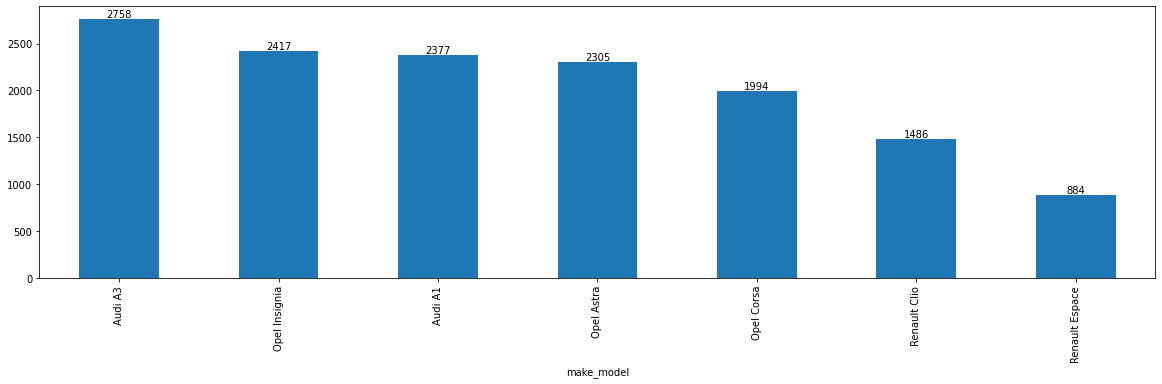

In [48]:
ax = df.make_model.value_counts().iloc[:35].plot(kind="bar", figsize=(20, 5))

ax.bar_label(ax.containers[0]);

In [49]:
pip install --upgrade seaborn pandas

Note: you may need to restart the kernel to use updated packages.


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

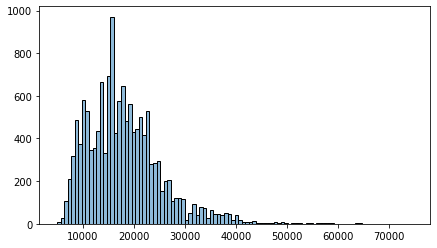

In [49]:
sns.histplot(df.price, bins=100, kde=True);

In [50]:
skew(df.price)

1.2668278550941403

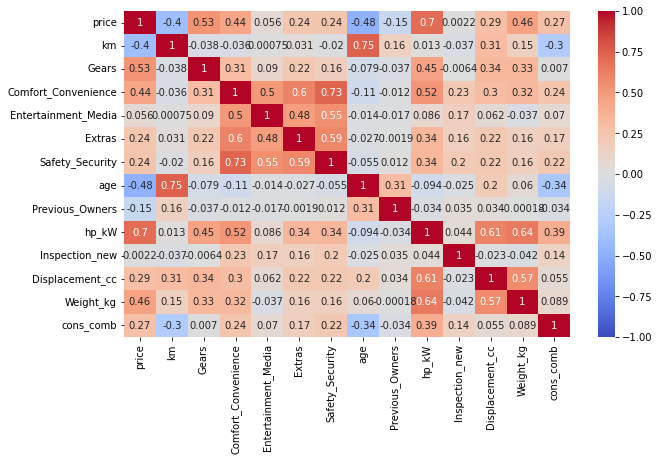

In [51]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap="coolwarm");

### Check multicollinearity

In [52]:
df.corr(numeric_only=True)[
    (abs(df.corr(numeric_only=True)) >= 0.9) & (abs(df.corr(numeric_only=True)) < 1)
].any().any()

False

### Outlier Detection

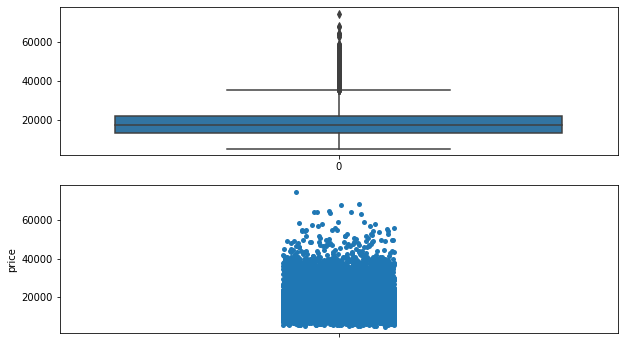

In [53]:
plt.figure(figsize=(10, 6))

plt.subplot(211)
sns.boxplot(df.price)

plt.subplot(212)
sns.stripplot(df.price);

In [54]:
total_outliers = []

for model in df.make_model.unique():
    car_prices = df[df["make_model"] == model]["price"]

    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    IQR = Q3 - Q1
    lower_lim = Q1 - 1.5 * IQR
    upper_lim = Q3 + 1.5 * IQR

    count_of_outliers = (
        car_prices[(car_prices < lower_lim) | (car_prices > upper_lim)]
    ).count()

    total_outliers.append(count_of_outliers)

    print(
        f" The count of outlier for {model:<24} : {count_of_outliers:<2},\
    The rate of outliers : {(count_of_outliers/len(df[df['make_model']== model])).round(3)}"
    )
print()
print(
    "Total_outliers : ",
    sum(total_outliers),
    "The rate of total outliers :",
    (sum(total_outliers) / len(df)).round(3),
)

 The count of outlier for Audi A1                  : 5 ,    The rate of outliers : 0.002
 The count of outlier for Audi A3                  : 56,    The rate of outliers : 0.02
 The count of outlier for Opel Astra               : 127,    The rate of outliers : 0.055
 The count of outlier for Opel Corsa               : 0 ,    The rate of outliers : 0.0
 The count of outlier for Opel Insignia            : 109,    The rate of outliers : 0.045
 The count of outlier for Renault Clio             : 37,    The rate of outliers : 0.025
 The count of outlier for Renault Espace           : 20,    The rate of outliers : 0.023

Total_outliers :  354 The rate of total outliers : 0.025


# Data Pre-Processing

## Train, Test and Split

In [55]:
X = df.drop(columns="price")
y = df.price

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## OneHotEncoder

In [57]:
for i in df.select_dtypes("object"):
    print(f"{i:<30}:", df[i].unique())

make_model                    : ['Audi A1' 'Audi A3' 'Opel Astra' 'Opel Corsa' 'Opel Insignia'
 'Renault Clio' 'Renault Espace']
body_type                     : ['Sedans' 'Station wagon' 'Compact' 'Coupe' 'Van' 'Convertible' 'Off-Road'
 'Transporter']
vat                           : ['VAT deductible' 'Price negotiable']
Type                          : ['Used' "Employee's car" 'New' 'Demonstration' 'Pre-registered']
Fuel                          : ['Diesel' 'Benzine' 'LPG/CNG' 'Electric']
Paint_Type                    : ['Metallic' 'Uni/basic' 'Perl effect']
Upholstery_type               : ['Cloth' 'Part/Full Leather']
Gearing_Type                  : ['Automatic' 'Manual' 'Semi-automatic']
Drive_chain                   : ['front' '4WD' 'rear']


In [58]:
df.select_dtypes(include="object").head(1)

make_model body_type             vat  Type    Fuel Paint_Type  \
0    Audi A1    Sedans  VAT deductible  Used  Diesel   Metallic   

  Upholstery_type Gearing_Type Drive_chain  
0           Cloth    Automatic       front

In [59]:
cat_onehot = [
    "make_model",
    "body_type",
    "vat",
    "Type",
    "Fuel",
    "Paint_Type",
    "Upholstery_type",
    "Gearing_Type",
    "Drive_chain",
]

In [60]:
#pip install --upgrade scikit-learn

In [61]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot),
    remainder="passthrough",
    verbose_feature_names_out=False,
)  # MinMaxScaler()

column_trans = column_trans.set_output(transform="pandas")

In [62]:
X_train.head()

make_model      body_type             vat        km  \
14210  Renault Espace        Compact  VAT deductible   500.000   
10027   Opel Insignia  Station wagon  VAT deductible 68116.000   
318           Audi A1        Compact  VAT deductible 56967.000   
4098          Audi A3         Sedans  VAT deductible 21000.000   
3344          Audi A3         Sedans  VAT deductible 26613.000   

                 Type     Fuel  Gears  Comfort_Convenience  \
14210   Demonstration  Benzine  6.000                   26   
10027            Used   Diesel  6.000                   13   
318              Used  Benzine  7.000                   13   
4098   Employee's car   Diesel  6.000                   17   
3344             Used  Benzine  7.000                   16   

       Entertainment_Media  Extras  Safety_Security   age  Previous_Owners  \
14210                    7       2               19 0.000            1.000   
10027                    6       3               13 3.000            1.000   
318                      6       2               13 3.000            2.000   
4098                     8       4               18 1.000            1.000   
3344                     7       3               13 2.000            1.000   

        hp_kW  Inspection_new Paint_Type    Upholstery_type Gearing_Type  \
14210 165.000               0   Metallic              Cloth    Automatic   
10027 100.000               1   Metallic              Cloth       Manual   
318    70.000               1   Metallic              Cloth    Automatic   
4098   85.000               0   Metallic  Part/Full Leather       Manual   
3344  110.000               0   Metallic              Cloth    Automatic   

       Displacement_cc  Weight_kg Drive_chain  cons_comb  
14210         1798.000   1760.000       front      6.800  
10027         1598.000   1487.000       front      3.900  
318            999.000   1180.000       front      4.400  
4098          1598.000   1335.000       front      4.000  
3344          1395.000   1300.000       front      4.600

In [63]:
X_test.head()

make_model      body_type               vat        km  Type  \
7261       Opel Astra  Station wagon    VAT deductible  1647.363   New   
8215       Opel Corsa         Sedans    VAT deductible 31398.000  Used   
13945  Renault Espace            Van    VAT deductible 29500.000  Used   
6684       Opel Astra         Sedans    VAT deductible 16950.000  Used   
13394  Renault Espace            Van  Price negotiable 41000.000  Used   

          Fuel  Gears  Comfort_Convenience  Entertainment_Media  Extras  \
7261   Benzine  6.000                   17                    5       1   
8215    Diesel  5.000                    4                    4       1   
13945   Diesel  6.000                   15                    5       2   
6684   Benzine  6.000                    9                    4       2   
13394   Diesel  6.000                   16                    4       2   

       Safety_Security   age  Previous_Owners   hp_kW  Inspection_new  \
7261                14 0.000            1.000  67.000               0   
8215                 9 2.000            1.000  55.000               0   
13945                7 2.000            1.000 118.000               0   
6684                13 1.000            1.000  92.000               0   
13394               12 2.000            1.000 118.000               0   

      Paint_Type    Upholstery_type Gearing_Type  Displacement_cc  Weight_kg  \
7261    Metallic              Cloth       Manual         1000.000   1425.000   
8215    Metallic              Cloth       Manual         1248.000   1162.000   
13945   Metallic  Part/Full Leather    Automatic         1598.000   1734.000   
6684    Metallic              Cloth       Manual         1399.000   1278.000   
13394   Metallic  Part/Full Leather    Automatic         1598.000   1734.000   

      Drive_chain  cons_comb  
7261        front      4.500  
8215        front      3.800  
13945       front      4.700  
6684        front      5.400  
13394       front      4.600

In [64]:
X_train.shape, X_test.shape

((11376, 22), (2845, 22))

In [65]:
column_trans.fit_transform(X_train).head()

make_model_Audi A1  make_model_Audi A3  make_model_Opel Astra  \
14210               0.000               0.000                  0.000   
10027               0.000               0.000                  0.000   
318                 1.000               0.000                  0.000   
4098                0.000               1.000                  0.000   
3344                0.000               1.000                  0.000   

       make_model_Opel Corsa  make_model_Opel Insignia  \
14210                  0.000                     0.000   
10027                  0.000                     1.000   
318                    0.000                     0.000   
4098                   0.000                     0.000   
3344                   0.000                     0.000   

       make_model_Renault Clio  make_model_Renault Espace  body_type_Compact  \
14210                    0.000                      1.000              1.000   
10027                    0.000                      0.000              0.000   
318                      0.000                      0.000              1.000   
4098                     0.000                      0.000              0.000   
3344                     0.000                      0.000              0.000   

       body_type_Convertible  body_type_Coupe  body_type_Off-Road  \
14210                  0.000            0.000               0.000   
10027                  0.000            0.000               0.000   
318                    0.000            0.000               0.000   
4098                   0.000            0.000               0.000   
3344                   0.000            0.000               0.000   

       body_type_Sedans  body_type_Station wagon  body_type_Transporter  \
14210             0.000                    0.000                  0.000   
10027             0.000                    1.000                  0.000   
318               0.000                    0.000                  0.000   
4098              1.000                    0.000                  0.000   
3344              1.000                    0.000                  0.000   

       body_type_Van  vat_Price negotiable  vat_VAT deductible  \
14210          0.000                 0.000               1.000   
10027          0.000                 0.000               1.000   
318            0.000                 0.000               1.000   
4098           0.000                 0.000               1.000   
3344           0.000                 0.000               1.000   

       Type_Demonstration  Type_Employee's car  Type_New  Type_Pre-registered  \
14210               1.000                0.000     0.000                0.000   
10027               0.000                0.000     0.000                0.000   
318                 0.000                0.000     0.000                0.000   
4098                0.000                1.000     0.000                0.000   
3344                0.000                0.000     0.000                0.000   

       Type_Used  Fuel_Benzine  Fuel_Diesel  Fuel_Electric  Fuel_LPG/CNG  \
14210      0.000         1.000        0.000          0.000         0.000   
10027      1.000         0.000        1.000          0.000         0.000   
318        1.000         1.000        0.000          0.000         0.000   
4098       0.000         0.000        1.000          0.000         0.000   
3344       1.000         1.000        0.000          0.000         0.000   

       Paint_Type_Metallic  Paint_Type_Perl effect  Paint_Type_Uni/basic  \
14210                1.000                   0.000                 0.000   
10027                1.000                   0.000                 0.000   
318                  1.000                   0.000                 0.000   
4098                 1.000                   0.000                 0.000   
3344                 1.000                   0.000                 0.000   

       Upholstery_type_Cloth  Upholstery_type_Part/Full Leather  \
14210        

In [66]:
X_train_trans = column_trans.fit_transform(X_train)
X_test_trans = column_trans.transform(X_test)

In [67]:
X_train_trans.shape, X_test_trans.shape

((11376, 50), (2845, 50))

In [68]:
X_train_trans.head()

make_model_Audi A1  make_model_Audi A3  make_model_Opel Astra  \
14210               0.000               0.000                  0.000   
10027               0.000               0.000                  0.000   
318                 1.000               0.000                  0.000   
4098                0.000               1.000                  0.000   
3344                0.000               1.000                  0.000   

       make_model_Opel Corsa  make_model_Opel Insignia  \
14210                  0.000                     0.000   
10027                  0.000                     1.000   
318                    0.000                     0.000   
4098                   0.000                     0.000   
3344                   0.000                     0.000   

       make_model_Renault Clio  make_model_Renault Espace  body_type_Compact  \
14210                    0.000                      1.000              1.000   
10027                    0.000                      0.000              0.000   
318                      0.000                      0.000              1.000   
4098                     0.000                      0.000              0.000   
3344                     0.000                      0.000              0.000   

       body_type_Convertible  body_type_Coupe  body_type_Off-Road  \
14210                  0.000            0.000               0.000   
10027                  0.000            0.000               0.000   
318                    0.000            0.000               0.000   
4098                   0.000            0.000               0.000   
3344                   0.000            0.000               0.000   

       body_type_Sedans  body_type_Station wagon  body_type_Transporter  \
14210             0.000                    0.000                  0.000   
10027             0.000                    1.000                  0.000   
318               0.000                    0.000                  0.000   
4098              1.000                    0.000                  0.000   
3344              1.000                    0.000                  0.000   

       body_type_Van  vat_Price negotiable  vat_VAT deductible  \
14210          0.000                 0.000               1.000   
10027          0.000                 0.000               1.000   
318            0.000                 0.000               1.000   
4098           0.000                 0.000               1.000   
3344           0.000                 0.000               1.000   

       Type_Demonstration  Type_Employee's car  Type_New  Type_Pre-registered  \
14210               1.000                0.000     0.000                0.000   
10027               0.000                0.000     0.000                0.000   
318                 0.000                0.000     0.000                0.000   
4098                0.000                1.000     0.000                0.000   
3344                0.000                0.000     0.000                0.000   

       Type_Used  Fuel_Benzine  Fuel_Diesel  Fuel_Electric  Fuel_LPG/CNG  \
14210      0.000         1.000        0.000          0.000         0.000   
10027      1.000         0.000        1.000          0.000         0.000   
318        1.000         1.000        0.000          0.000         0.000   
4098       0.000         0.000        1.000          0.000         0.000   
3344       1.000         1.000        0.000          0.000         0.000   

       Paint_Type_Metallic  Paint_Type_Perl effect  Paint_Type_Uni/basic  \
14210                1.000                   0.000                 0.000   
10027                1.000                   0.000                 0.000   
318                  1.000                   0.000                 0.000   
4098                 1.000                   0.000                 0.000   
3344                 1.000                   0.000                 0.000   

       Upholstery_type_Cloth  Upholstery_type_Part/Full Leather  \
14210        

In [69]:
X_test_trans.head()

make_model_Audi A1  make_model_Audi A3  make_model_Opel Astra  \
7261                0.000               0.000                  1.000   
8215                0.000               0.000                  0.000   
13945               0.000               0.000                  0.000   
6684                0.000               0.000                  1.000   
13394               0.000               0.000                  0.000   

       make_model_Opel Corsa  make_model_Opel Insignia  \
7261                   0.000                     0.000   
8215                   1.000                     0.000   
13945                  0.000                     0.000   
6684                   0.000                     0.000   
13394                  0.000                     0.000   

       make_model_Renault Clio  make_model_Renault Espace  body_type_Compact  \
7261                     0.000                      0.000              0.000   
8215                     0.000                      0.000              0.000   
13945                    0.000                      1.000              0.000   
6684                     0.000                      0.000              0.000   
13394                    0.000                      1.000              0.000   

       body_type_Convertible  body_type_Coupe  body_type_Off-Road  \
7261                   0.000            0.000               0.000   
8215                   0.000            0.000               0.000   
13945                  0.000            0.000               0.000   
6684                   0.000            0.000               0.000   
13394                  0.000            0.000               0.000   

       body_type_Sedans  body_type_Station wagon  body_type_Transporter  \
7261              0.000                    1.000                  0.000   
8215              1.000                    0.000                  0.000   
13945             0.000                    0.000                  0.000   
6684              1.000                    0.000                  0.000   
13394             0.000                    0.000                  0.000   

       body_type_Van  vat_Price negotiable  vat_VAT deductible  \
7261           0.000                 0.000               1.000   
8215           0.000                 0.000               1.000   
13945          1.000                 0.000               1.000   
6684           0.000                 0.000               1.000   
13394          1.000                 1.000               0.000   

       Type_Demonstration  Type_Employee's car  Type_New  Type_Pre-registered  \
7261                0.000                0.000     1.000                0.000   
8215                0.000                0.000     0.000                0.000   
13945               0.000                0.000     0.000                0.000   
6684                0.000                0.000     0.000                0.000   
13394               0.000                0.000     0.000                0.000   

       Type_Used  Fuel_Benzine  Fuel_Diesel  Fuel_Electric  Fuel_LPG/CNG  \
7261       0.000         1.000        0.000          0.000         0.000   
8215       1.000         0.000        1.000          0.000         0.000   
13945      1.000         0.000        1.000          0.000         0.000   
6684       1.000         1.000        0.000          0.000         0.000   
13394      1.000         0.000        1.000          0.000         0.000   

       Paint_Type_Metallic  Paint_Type_Perl effect  Paint_Type_Uni/basic  \
7261                 1.000                   0.000                 0.000   
8215                 1.000                   0.000                 0.000   
13945                1.000                   0.000                 0.000   
6684                 1.000                   0.000                 0.000   
13394                1.000                   0.000                 0.000   

       Upholstery_type_Cloth  Upholstery_type_Part/Full Leather  \
7261         

In [70]:
X_train_trans.join(y_train).corr()

make_model_Audi A1  make_model_Audi A3  \
make_model_Audi A1                              1.000              -0.219   
make_model_Audi A3                             -0.219               1.000   
make_model_Opel Astra                          -0.197              -0.218   
make_model_Opel Corsa                          -0.179              -0.198   
make_model_Opel Insignia                       -0.201              -0.222   
make_model_Renault Clio                        -0.153              -0.168   
make_model_Renault Espace                      -0.115              -0.127   
body_type_Compact                               0.210              -0.168   
body_type_Convertible                          -0.010               0.047   
body_type_Coupe                                -0.006               0.003   
body_type_Off-Road                             -0.018              -0.020   
body_type_Sedans                                0.095               0.330   
body_type_Station wagon                        -0.241              -0.166   
body_type_Transporter                          -0.033              -0.036   
body_type_Van                                  -0.105              -0.116   
vat_Price negotiable                            0.007               0.037   
vat_VAT deductible                             -0.007              -0.037   
Type_Demonstration                             -0.003              -0.067   
Type_Employee's car                             0.021               0.007   
Type_New                                        0.023              -0.000   
Type_Pre-registered                            -0.036               0.011   
Type_Used                                      -0.004               0.023   
Fuel_Benzine                                    0.160              -0.242   
Fuel_Diesel                                    -0.157               0.235   
Fuel_Electric                                  -0.007               0.019   
Fuel_LPG/CNG                                   -0.027               0.054   
Paint_Type_Metallic                             0.002              -0.031   
Paint_Type_Perl effect                         -0.004              -0.014   
Paint_Type_Uni/basic                           -0.002               0.033   
Upholstery_type_Cloth                           0.162               0.058   
Upholstery_type_Part/Full Leather              -0.162              -0.058   
Gearing_Type_Automatic                         -0.018              -0.026   
Gearing_Type_Manual                             0.028              -0.032   
Gearing_Type_Semi-automatic                    -0.028               0.166   
Drive_chain_4WD                                -0.038              -0.016   
Drive_chain_front                               0.038               0.017   
Drive_chain_rear                               -0.007              -0.008   
km                                             -0.131               0.084   
Gears                                           0.016               0.378   
Comfort_Convenience                            -0.055              -0.097   
Entertainment_Media                             0.005               0.012   
Extras                                          0.014              -0.007   
Safety_Security                                -0.074              -0.072   
age                                            -0.025               0.048   
Previous_Owners                                -0.003              -0.062   
hp_kW                                          -0.207               0.031   
Inspection_new                                  0.062              -0.097   
Displacement_cc                                -0.403               0.157   
Weight_kg                                      -0.320               0.084   
cons_comb                                      -0.241              -0.304   
price                                           0.042               0.187   

                              

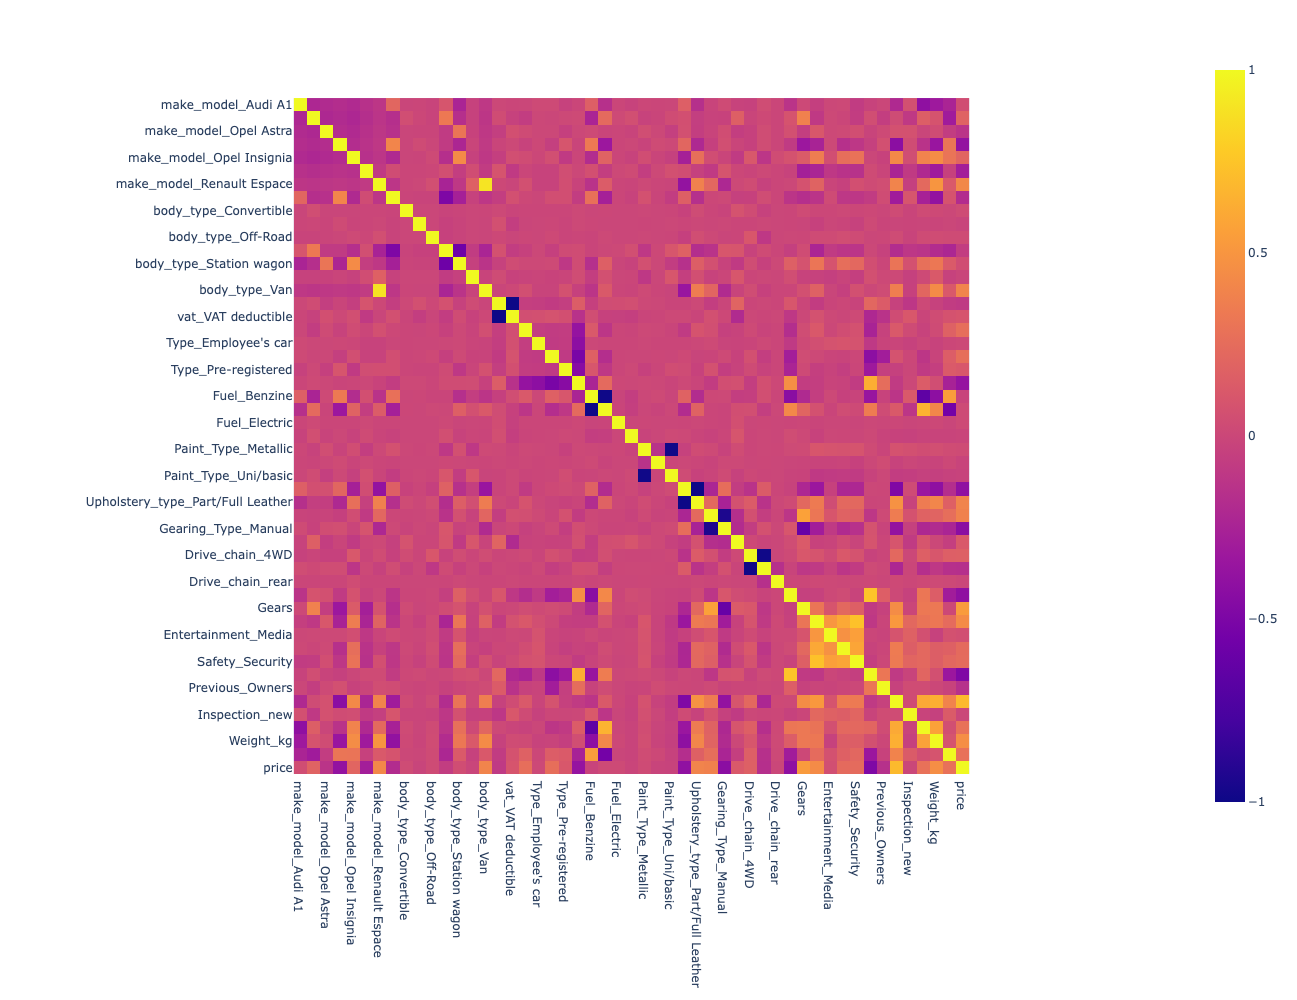

In [71]:
import plotly.express as px

corr = X_train_trans.join(y_train).corr()
fig = px.imshow(corr, width=1000, height=1000)
fig.show()

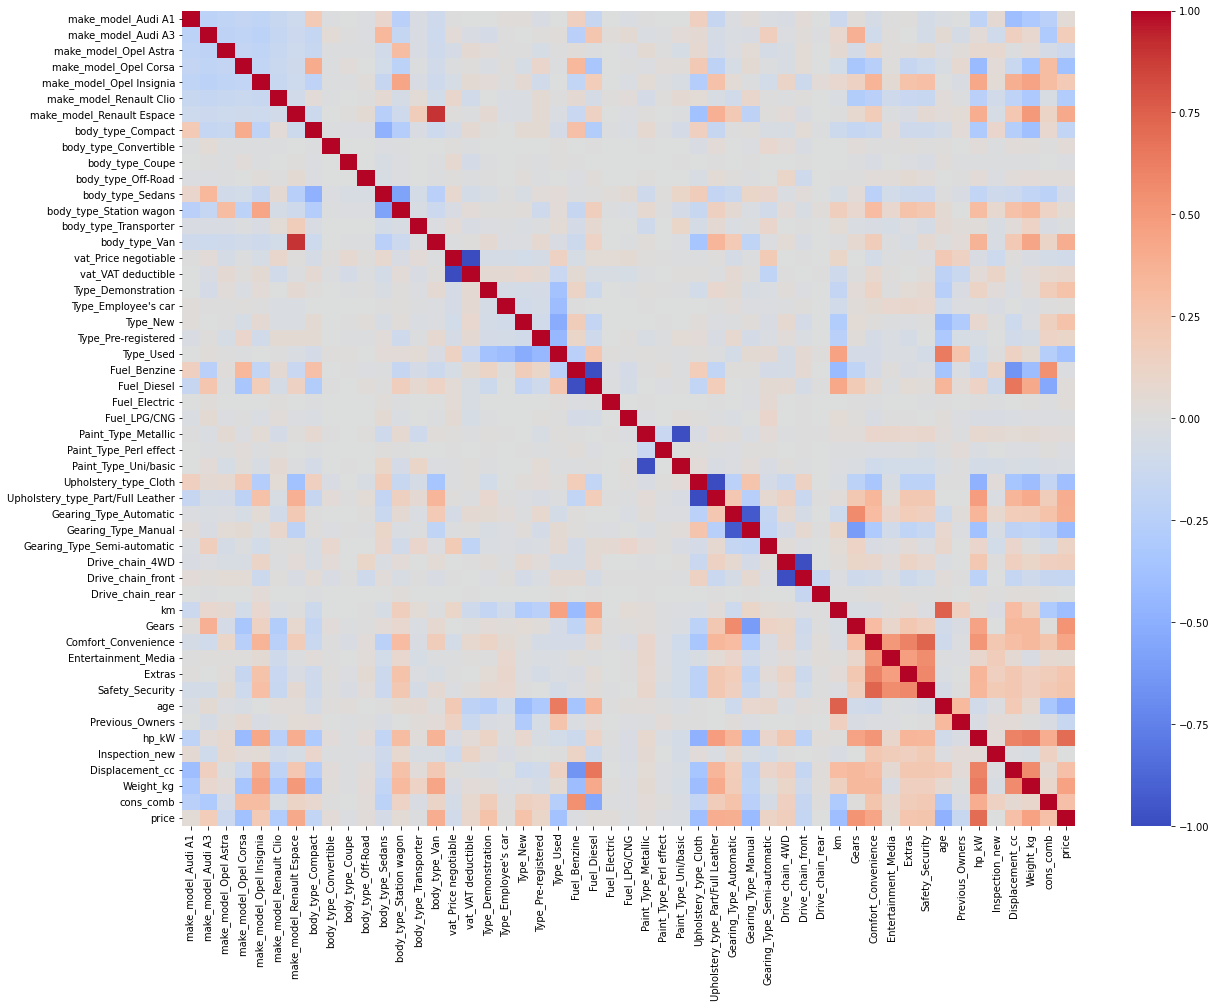

In [72]:
plt.figure(figsize=(20, 15))
sns.heatmap(X_train_trans.join(y_train).corr(), vmin=-1, vmax=1, cmap="coolwarm");

## Scaling

In [73]:
scaler = MinMaxScaler().set_output(transform="pandas")
scaler.fit(X_train_trans)

X_train_scaled = scaler.transform(X_train_trans)
X_test_scaled = scaler.transform(X_test_trans)

In [74]:
X_train_scaled.head()

make_model_Audi A1  make_model_Audi A3  make_model_Opel Astra  \
14210               0.000               0.000                  0.000   
10027               0.000               0.000                  0.000   
318                 1.000               0.000                  0.000   
4098                0.000               1.000                  0.000   
3344                0.000               1.000                  0.000   

       make_model_Opel Corsa  make_model_Opel Insignia  \
14210                  0.000                     0.000   
10027                  0.000                     1.000   
318                    0.000                     0.000   
4098                   0.000                     0.000   
3344                   0.000                     0.000   

       make_model_Renault Clio  make_model_Renault Espace  body_type_Compact  \
14210                    0.000                      1.000              1.000   
10027                    0.000                      0.000              0.000   
318                      0.000                      0.000              1.000   
4098                     0.000                      0.000              0.000   
3344                     0.000                      0.000              0.000   

       body_type_Convertible  body_type_Coupe  body_type_Off-Road  \
14210                  0.000            0.000               0.000   
10027                  0.000            0.000               0.000   
318                    0.000            0.000               0.000   
4098                   0.000            0.000               0.000   
3344                   0.000            0.000               0.000   

       body_type_Sedans  body_type_Station wagon  body_type_Transporter  \
14210             0.000                    0.000                  0.000   
10027             0.000                    1.000                  0.000   
318               0.000                    0.000                  0.000   
4098              1.000                    0.000                  0.000   
3344              1.000                    0.000                  0.000   

       body_type_Van  vat_Price negotiable  vat_VAT deductible  \
14210          0.000                 0.000               1.000   
10027          0.000                 0.000               1.000   
318            0.000                 0.000               1.000   
4098           0.000                 0.000               1.000   
3344           0.000                 0.000               1.000   

       Type_Demonstration  Type_Employee's car  Type_New  Type_Pre-registered  \
14210               1.000                0.000     0.000                0.000   
10027               0.000                0.000     0.000                0.000   
318                 0.000                0.000     0.000                0.000   
4098                0.000                1.000     0.000                0.000   
3344                0.000                0.000     0.000                0.000   

       Type_Used  Fuel_Benzine  Fuel_Diesel  Fuel_Electric  Fuel_LPG/CNG  \
14210      0.000         1.000        0.000          0.000         0.000   
10027      1.000         0.000        1.000          0.000         0.000   
318        1.000         1.000        0.000          0.000         0.000   
4098       0.000         0.000        1.000          0.000         0.000   
3344       1.000         1.000        0.000          0.000         0.000   

       Paint_Type_Metallic  Paint_Type_Perl effect  Paint_Type_Uni/basic  \
14210                1.000                   0.000                 0.000   
10027                1.000                   0.000                 0.000   
318                  1.000                   0.000                 0.000   
4098                 1.000                   0.000                 0.000   
3344                 1.000                   0.000                 0.000   

       Upholstery_type_Cloth  Upholstery_type_Part/Full Leather  \
14210        

In [75]:
X_test_scaled.head()

make_model_Audi A1  make_model_Audi A3  make_model_Opel Astra  \
7261                0.000               0.000                  1.000   
8215                0.000               0.000                  0.000   
13945               0.000               0.000                  0.000   
6684                0.000               0.000                  1.000   
13394               0.000               0.000                  0.000   

       make_model_Opel Corsa  make_model_Opel Insignia  \
7261                   0.000                     0.000   
8215                   1.000                     0.000   
13945                  0.000                     0.000   
6684                   0.000                     0.000   
13394                  0.000                     0.000   

       make_model_Renault Clio  make_model_Renault Espace  body_type_Compact  \
7261                     0.000                      0.000              0.000   
8215                     0.000                      0.000              0.000   
13945                    0.000                      1.000              0.000   
6684                     0.000                      0.000              0.000   
13394                    0.000                      1.000              0.000   

       body_type_Convertible  body_type_Coupe  body_type_Off-Road  \
7261                   0.000            0.000               0.000   
8215                   0.000            0.000               0.000   
13945                  0.000            0.000               0.000   
6684                   0.000            0.000               0.000   
13394                  0.000            0.000               0.000   

       body_type_Sedans  body_type_Station wagon  body_type_Transporter  \
7261              0.000                    1.000                  0.000   
8215              1.000                    0.000                  0.000   
13945             0.000                    0.000                  0.000   
6684              1.000                    0.000                  0.000   
13394             0.000                    0.000                  0.000   

       body_type_Van  vat_Price negotiable  vat_VAT deductible  \
7261           0.000                 0.000               1.000   
8215           0.000                 0.000               1.000   
13945          1.000                 0.000               1.000   
6684           0.000                 0.000               1.000   
13394          1.000                 1.000               0.000   

       Type_Demonstration  Type_Employee's car  Type_New  Type_Pre-registered  \
7261                0.000                0.000     1.000                0.000   
8215                0.000                0.000     0.000                0.000   
13945               0.000                0.000     0.000                0.000   
6684                0.000                0.000     0.000                0.000   
13394               0.000                0.000     0.000                0.000   

       Type_Used  Fuel_Benzine  Fuel_Diesel  Fuel_Electric  Fuel_LPG/CNG  \
7261       0.000         1.000        0.000          0.000         0.000   
8215       1.000         0.000        1.000          0.000         0.000   
13945      1.000         0.000        1.000          0.000         0.000   
6684       1.000         1.000        0.000          0.000         0.000   
13394      1.000         0.000        1.000          0.000         0.000   

       Paint_Type_Metallic  Paint_Type_Perl effect  Paint_Type_Uni/basic  \
7261                 1.000                   0.000                 0.000   
8215                 1.000                   0.000                 0.000   
13945                1.000                   0.000                 0.000   
6684                 1.000                   0.000                 0.000   
13394                1.000                   0.000                 0.000   

       Upholstery_type_Cloth  Upholstery_type_Part/Full Leather  \
7261         

## Linear Regression

In [76]:
def train_val(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {
        "train": {
            "R2": r2_score(y_train, y_train_pred),
            "mae": mean_absolute_error(y_train, y_train_pred),
            "mse": mean_squared_error(y_train, y_train_pred),
            "rmse": mean_squared_error(y_train, y_train_pred, squared=False),
        },
        "test": {
            "R2": r2_score(y_test, y_pred),
            "mae": mean_absolute_error(y_test, y_pred),
            "mse": mean_squared_error(y_test, y_pred),
            "rmse": mean_squared_error(y_test, y_pred, squared=False),
        },
    }

    return pd.DataFrame(scores)

In [77]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [78]:
train_val(lm, X_train_scaled, y_train, X_test_scaled, y_test)

train        test
R2         0.870       0.868
mae     1866.997    1839.665
mse  7175437.480 7200495.679
rmse    2678.701    2683.374

## Adjusted R2 Score

In [79]:
def adj_r2(y_test, y_pred, X):
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]  # number of observations
    p = X.shape[1]  # number of independent variables
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    return adj_r2

In [80]:
y_pred = lm.predict(X_test_scaled)

In [81]:
adj_r2(y_test, y_pred, X_test_scaled)

0.8659744742112556

## Cross Validate

In [82]:
model = LinearRegression()

scores = cross_validate(
    model,
    X_train_scaled,
    y_train,
    scoring=[
        "r2",
        "neg_mean_absolute_error",
        "neg_mean_squared_error",
        "neg_root_mean_squared_error",
    ],
    cv=10,
    return_train_score=True,
)

In [83]:
pd.DataFrame(scores)

fit_time  score_time                    test_r2  train_r2  \
0     0.027       0.002                      0.873     0.870   
1     0.029       0.002                      0.862     0.871   
2     0.019       0.002                      0.888     0.868   
3     0.029       0.002                      0.869     0.870   
4     0.032       0.002                      0.862     0.871   
5     0.052       0.002                      0.871     0.870   
6     0.016       0.002                      0.856     0.872   
7     0.014       0.002                      0.869     0.870   
8     0.014       0.002                      0.855     0.871   
9     0.014       0.002 -159882353530646003712.000     0.869   

   test_neg_mean_absolute_error  train_neg_mean_absolute_error  \
0                     -1866.034                      -1868.894   
1                     -1893.755                      -1858.573   
2                     -1807.764                      -1872.146   
3                     -1829.034                      -1877.171   
4                     -1888.412                      -1867.991   
5                     -1829.850                      -1867.884   
6                     -1959.513                      -1848.960   
7                     -1879.829                      -1860.752   
8                     -1981.142                      -1858.519   
9            -4894982136732.066                      -1868.942   

        test_neg_mean_squared_error  train_neg_mean_squared_error  \
0                      -7205957.971                  -7173051.596   
1                      -7652729.075                  -7131323.753   
2                      -6162905.864                  -7285529.124   
3                      -6322815.980                  -7272754.056   
4                      -7284984.590                  -7176998.925   
5                      -6641557.941                  -7240822.063   
6                      -8783162.774                  -7009052.610   
7                      -7383815.259                  -7149857.944   
8                      -8280046.619                  -7075720.184   
9 -9081162188335863994823737344.000                  -7185857.442   

   test_neg_root_mean_squared_error  train_neg_root_mean_squared_error  
0                         -2684.392                          -2678.255  
1                         -2766.357                          -2670.454  
2                         -2482.520                          -2699.172  
3                         -2514.521                          -2696.804  
4                         -2699.071                          -2678.992  
5                         -2577.122                          -2690.878  
6                         -2963.640                          -2647.462  
7                         -2717.318                          -2673.922  
8                         -2877.507                          -2660.023  
9               -95295132028534.719                          -2680.645

In [84]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                    -15988235353064599552.000
train_r2                                                       0.870
test_neg_mean_absolute_error                       -489498215366.740
train_neg_mean_absolute_error                              -1864.983
test_neg_mean_squared_error         -908116218833586371994583040.000
train_neg_mean_squared_error                            -7170096.770
test_neg_root_mean_squared_error                  -9529513205281.717
train_neg_root_mean_squared_error                          -2677.661
dtype: float64

In [85]:
train_val(lm, X_train_scaled, y_train, X_test_scaled, y_test)

train        test
R2         0.870       0.868
mae     1866.997    1839.665
mse  7175437.480 7200495.679
rmse    2678.701    2683.374

In [86]:
2683 / df.price.mean()

0.14817127385261564

## Prediction Error with Outliers

In [87]:
#pip install yellowbrick

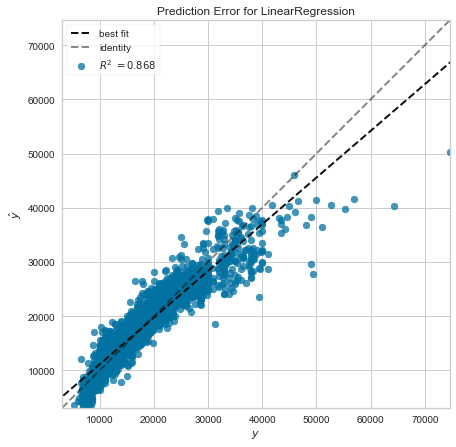

In [88]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(500, 1000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show();

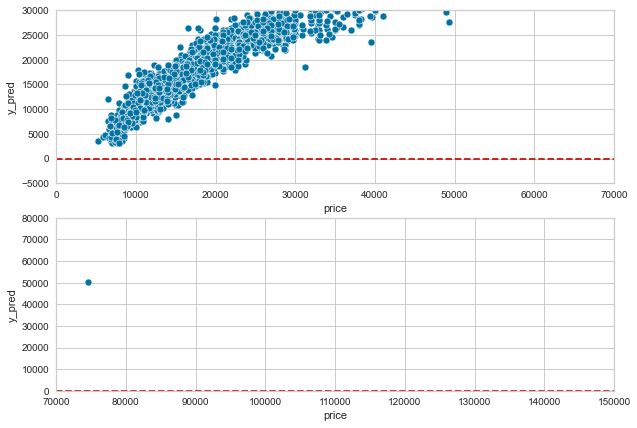

In [89]:
y_pred = lm.predict(X_test_scaled)


plt.figure(figsize=(10, 7))
plt.subplot(211)

sns.scatterplot(x=y_test, y=y_pred)  # -residuals
plt.axhline(y=0, color="r", linestyle="--")
plt.ylabel("y_pred")
plt.xlim([0, 70000])
plt.ylim([-5000, 30000])

plt.subplot(212)

sns.scatterplot(x=y_test, y=y_pred)  # -residuals
plt.axhline(y=0, color="r", linestyle="--")
plt.ylabel("y_pred")
plt.xlim([70000, 150000])
plt.ylim([0, 80000])
plt.show();

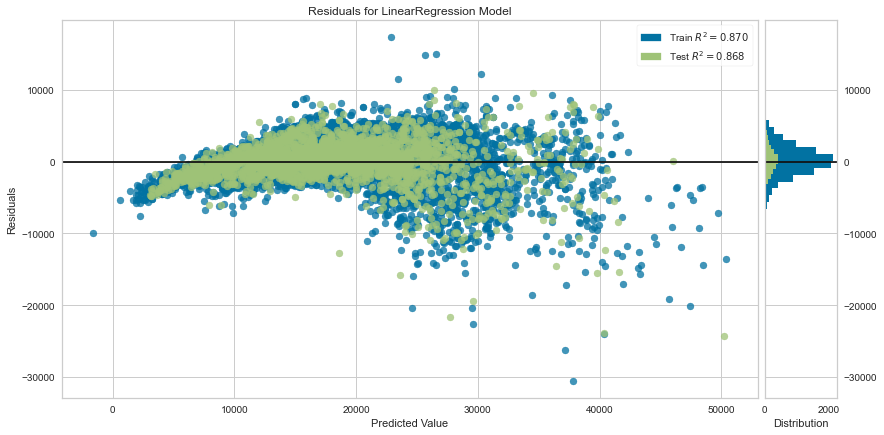

In [90]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 500))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show();

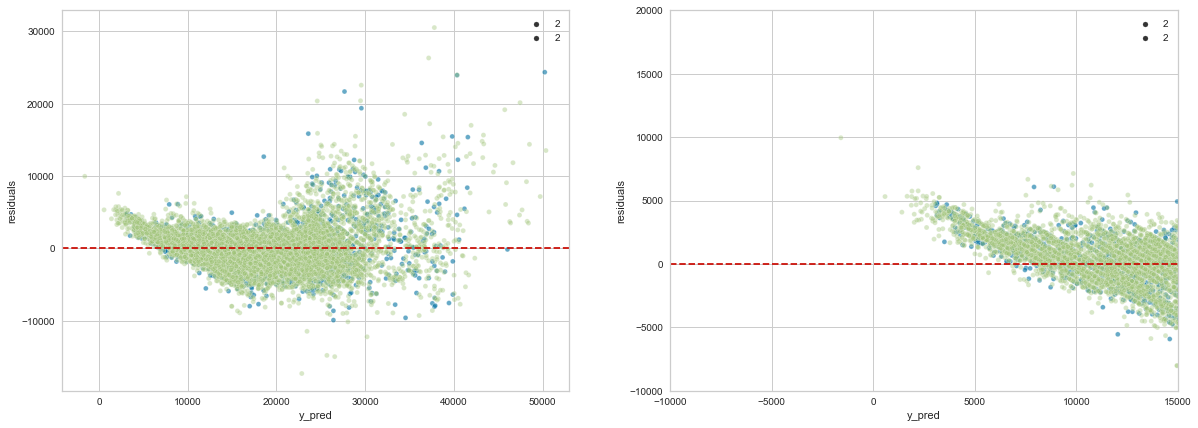

In [91]:
y_pred = lm.predict(X_test_scaled)
y_pred_train = lm.predict(X_train_scaled)

residual_test = y_test - y_pred
residual_train = y_train - y_pred_train

plt.figure(figsize=(20, 7))
plt.subplot(121)

sns.scatterplot(x=y_pred, y=residual_test, palette="deep", size=2, alpha=0.6)
sns.scatterplot(x=y_pred_train, y=residual_train, size=2, alpha=0.4)

plt.axhline(y=0, color="r", linestyle="--")
plt.ylabel("residuals")
plt.xlabel("y_pred")

plt.subplot(122)

sns.scatterplot(x=y_pred, y=residual_test, palette="deep", size=2, alpha=0.6)
sns.scatterplot(x=y_pred_train, y=residual_train, size=2, alpha=0.4)

plt.axhline(y=0, color="r", linestyle="--")
plt.ylabel("residuals")
plt.xlabel("y_pred")
plt.xlim([-10000, 15000])
plt.ylim([-10000, 20000])
plt.show();

## Pipeline

In [92]:
X = df.drop(columns=["price"])
y = df.price

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [93]:
X_train.head()

make_model      body_type             vat        km  \
14210  Renault Espace        Compact  VAT deductible   500.000   
10027   Opel Insignia  Station wagon  VAT deductible 68116.000   
318           Audi A1        Compact  VAT deductible 56967.000   
4098          Audi A3         Sedans  VAT deductible 21000.000   
3344          Audi A3         Sedans  VAT deductible 26613.000   

                 Type     Fuel  Gears  Comfort_Convenience  \
14210   Demonstration  Benzine  6.000                   26   
10027            Used   Diesel  6.000                   13   
318              Used  Benzine  7.000                   13   
4098   Employee's car   Diesel  6.000                   17   
3344             Used  Benzine  7.000                   16   

       Entertainment_Media  Extras  Safety_Security   age  Previous_Owners  \
14210                    7       2               19 0.000            1.000   
10027                    6       3               13 3.000            1.000   
318                      6       2               13 3.000            2.000   
4098                     8       4               18 1.000            1.000   
3344                     7       3               13 2.000            1.000   

        hp_kW  Inspection_new Paint_Type    Upholstery_type Gearing_Type  \
14210 165.000               0   Metallic              Cloth    Automatic   
10027 100.000               1   Metallic              Cloth       Manual   
318    70.000               1   Metallic              Cloth    Automatic   
4098   85.000               0   Metallic  Part/Full Leather       Manual   
3344  110.000               0   Metallic              Cloth    Automatic   

       Displacement_cc  Weight_kg Drive_chain  cons_comb  
14210         1798.000   1760.000       front      6.800  
10027         1598.000   1487.000       front      3.900  
318            999.000   1180.000       front      4.400  
4098          1598.000   1335.000       front      4.000  
3344          1395.000   1300.000       front      4.600

In [94]:
cat_onehot = [
    "make_model",
    "body_type",
    "vat",
    "Type",
    "Fuel",
    "Paint_Type",
    "Upholstery_type",
    "Gearing_Type",
    "Drive_chain",
]

In [95]:
cat_onehot

['make_model',
 'body_type',
 'vat',
 'Type',
 'Fuel',
 'Paint_Type',
 'Upholstery_type',
 'Gearing_Type',
 'Drive_chain']

In [96]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

enc_onehot = OneHotEncoder(handle_unknown="ignore", sparse=False)

column_trans = make_column_transformer(
    (enc_onehot, cat_onehot),
    remainder="passthrough",
    verbose_feature_names_out=False,
)  # MinMaxScaler()

In [97]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

operations = [
    ("OneHot_Encoder", column_trans),
    ("scaler", MinMaxScaler()),
    ("Ridge", Ridge()),
]

ridge_pipe = Pipeline(steps=operations).set_output(transform="pandas")
# If we want the outputs of the given transform algorithms to be dataframes,
# you can add set_output(transform="pandas") to the end of the pipeline.

ridge_pipe.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'vat', 'Type', 'Fuel',
                                                   'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Ridge', Ridge())])

In [160]:
lm2 = LinearRegression()
lm2.fit(X_train_scaled, y_train)

LinearRegression()

In [161]:
train_val(lm2, X_train_scaled, y_train, X_test_scaled, y_test)

train        test
R2         0.870       0.868
mae     1866.997    1839.665
mse  7175437.480 7200495.679
rmse    2678.701    2683.374

In [162]:
y_pred = lm2.predict(X_test_scaled)

lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = mean_squared_error(y_test, y_pred, squared=False)

## Implement Ridge Regression

In [98]:
from sklearn.linear_model import Ridge

In [99]:
operations = [
    ("OneHot_Encoder", column_trans),
    ("scaler", MinMaxScaler()),
    ("Ridge", Ridge()),
]

ridge_model = Pipeline(steps=operations)
ridge_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'vat', 'Type', 'Fuel',
                                                   'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Ridge', Ridge())])

In [100]:
train_val(ridge_model, X_train, y_train, X_test, y_test)

train        test
R2         0.870       0.869
mae     1863.197    1834.165
mse  7174904.689 7180430.534
rmse    2678.601    2679.633

In [101]:
2679 / df.price.mean()

0.14795036997806832

## Cross Validation

In [102]:
operations = [
    ("OneHot_Encoder", column_trans),
    ("scaler", MinMaxScaler()),
    ("Ridge", Ridge()),
]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(
    pipe_model,
    X_train,
    y_train,
    scoring=[
        "r2",
        "neg_mean_absolute_error",
        "neg_mean_squared_error",
        "neg_root_mean_squared_error",
    ],
    cv=10,
    return_train_score=True,
)

In [103]:
scores = pd.DataFrame(scores, index=range(1, 11))
scores

fit_time  score_time  test_r2  train_r2  test_neg_mean_absolute_error  \
1      0.052       0.008    0.873     0.870                     -1865.583   
2      0.034       0.007    0.862     0.871                     -1896.507   
3      0.032       0.007    0.888     0.868                     -1809.109   
4      0.029       0.006    0.869     0.870                     -1823.438   
5      0.030       0.006    0.863     0.871                     -1884.393   
6      0.030       0.007    0.871     0.870                     -1824.782   
7      0.032       0.006    0.855     0.872                     -1956.296   
8      0.030       0.006    0.870     0.870                     -1880.930   
9      0.030       0.006    0.856     0.872                     -1968.138   
10     0.028       0.006    0.874     0.869                     -1823.237   

    train_neg_mean_absolute_error  test_neg_mean_squared_error  \
1                       -1867.404                 -7194851.347   
2                       -1856.725                 -7659917.092   
3                       -1871.887                 -6160964.760   
4                       -1874.590                 -6309071.337   
5                       -1865.333                 -7201416.424   
6                       -1866.199                 -6643472.343   
7                       -1846.796                 -8817132.916   
8                       -1858.932                 -7377318.533   
9                       -1852.261                 -8222918.619   
10                      -1866.357                 -7131897.566   

    train_neg_mean_squared_error  test_neg_root_mean_squared_error  \
1                   -7177671.357                         -2682.322   
2                   -7132021.523                         -2767.656   
3                   -7289992.372                         -2482.129   
4                   -7274501.409                         -2511.786   
5                   -7175305.331                         -2683.545   
6                   -7242067.257                         -2577.493   
7                   -7009911.007                         -2969.366   
8                   -7155556.415                         -2716.122   
9                   -7062366.900                         -2867.563   
10                  -7188696.555                         -2670.561   

    train_neg_root_mean_squared_error  
1                           -2679.118  
2                           -2670.584  
3                           -2699.999  
4                           -2697.128  
5                           -2678.676  
6                           -2691.109  
7                           -2647.624  
8                           -2674.987  
9                           -2657.511  
10                          -2681.174

In [104]:
scores = pd.DataFrame(scores, index=range(1, 11))
scores.iloc[:, 2:].mean()

test_r2                                    0.868
train_r2                                   0.870
test_neg_mean_absolute_error           -1873.241
train_neg_mean_absolute_error          -1862.648
test_neg_mean_squared_error         -7271896.094
train_neg_mean_squared_error        -7170809.013
test_neg_root_mean_squared_error       -2692.854
train_neg_root_mean_squared_error      -2677.791
dtype: float64

## Finding best alpha for Ridge

In [105]:
from sklearn.model_selection import GridSearchCV

In [106]:
alpha_space = np.linspace(0.001, 100, 100)

In [107]:
operations = [
    ("OneHot_Encoder", column_trans),
    ("scaler", MinMaxScaler()),
    ("Ridge", Ridge()),
]

pipe_model = Pipeline(steps=operations)

param_grid = {
    "Ridge__alpha": alpha_space
}  # Parameter names should be used together with the model name defined
# in the pipeline.

ridge_grid_model = GridSearchCV(
    estimator=pipe_model,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",
    cv=10,
    n_jobs=-1,
    return_train_score=True,
)

In [108]:
pipe_model.get_params() 

{'memory': None,
 'steps': [('OneHot_Encoder',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse=False),
                                    ['make_model', 'body_type', 'vat', 'Type',
                                     'Fuel', 'Paint_Type', 'Upholstery_type',
                                     'Gearing_Type', 'Drive_chain'])],
                     verbose_feature_names_out=False)),
  ('scaler', MinMaxScaler()),
  ('Ridge', Ridge())],
 'verbose': False,
 'OneHot_Encoder': ColumnTransformer(remainder='passthrough',
                   transformers=[('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  ['make_model', 'body_type', 'vat', 'Type',
                                

In [109]:
ridge_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'vat',
                                                                          'Type',
                                                                          'Fuel',
                                                                          'Paint_Type',
                                                                          'Upholstery_type',
                                                                          'Gearing_Type',
                                                                          'Drive_chain'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', MinMaxSca...
        72.72754545,  73.73763636,  74.74772727,  75.75781818,
        76.76790909,  77.778     ,  78.78809091,  79.79818182,
        80.80827273,  81.81836364,  82.82845455,  83.83854545,
        84.84863636,  85.85872727,  86.86881818,  87.87890909,
        88.889     ,  89.89909091,  90.90918182,  91.91927273,
        92.92936364,  93.93945455,  94.94954545,  95.95963636,
        96.96972727,  97.97981818,  98.98990909, 100.        ])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [110]:
ridge_grid_model.best_estimator_

Pipeline(steps=[('OneHot_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'vat', 'Type', 'Fuel',
                                                   'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('Ridge', Ridge(alpha=1.011090909090909))])

In [111]:
pd.DataFrame(ridge_grid_model.cv_results_).loc[
    ridge_grid_model.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score    -2692.861
mean_train_score   -2677.810
Name: 1, dtype: object

In [112]:
train_val(ridge_grid_model, X_train, y_train, X_test, y_test)

train        test
R2         0.870       0.869
mae     1863.188    1834.151
mse  7174987.723 7180367.853
rmse    2678.617    2679.621

In [113]:
y_pred = ridge_grid_model.predict(X_test)
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = mean_squared_error(y_test, y_pred, squared=False)

In [114]:
ridge_grid_model.best_estimator_["Ridge"].coef_

array([  1593.51125381,   2656.72401495,  -2562.06167698,  -3552.25884132,
           75.74490873,  -3534.59694005,   5322.93728072,    -66.07235776,
         1001.54350186,   -413.31159116,   -239.70252548,     -7.53458775,
           37.53895339,  -1670.34975469,   1357.88836161,   -123.51179877,
          123.51179877,   2335.97828507,  -1534.88494999,    900.95425235,
         -576.43875762,  -1125.60882979,  -2043.24117675,  -1216.82088285,
         4091.91711715,   -831.85505759,   -128.60335753,    129.30048392,
           -0.69712639,   -344.25240121,    344.25240119,   -464.48382613,
        -1779.38839249,   2243.87221862,   2307.67780861,   -211.69428661,
        -2095.98352201, -11518.60432178,   1910.12934224,   3746.60737729,
        -1368.52464932,     22.20693718,   -489.90660775,  -5149.07658605,
          933.321183  ,  25675.2833248 ,   -311.78328749,  -1283.90224621,
        -1410.37956453,    979.15125177])

In [115]:
ridge_grid_model.best_estimator_["OneHot_Encoder"].get_feature_names_out()

array(['make_model_Audi A1', 'make_model_Audi A3',
       'make_model_Opel Astra', 'make_model_Opel Corsa',
       'make_model_Opel Insignia', 'make_model_Renault Clio',
       'make_model_Renault Espace', 'body_type_Compact',
       'body_type_Convertible', 'body_type_Coupe', 'body_type_Off-Road',
       'body_type_Sedans', 'body_type_Station wagon',
       'body_type_Transporter', 'body_type_Van', 'vat_Price negotiable',
       'vat_VAT deductible', 'Type_Demonstration', "Type_Employee's car",
       'Type_New', 'Type_Pre-registered', 'Type_Used', 'Fuel_Benzine',
       'Fuel_Diesel', 'Fuel_Electric', 'Fuel_LPG/CNG',
       'Paint_Type_Metallic', 'Paint_Type_Perl effect',
       'Paint_Type_Uni/basic', 'Upholstery_type_Cloth',
       'Upholstery_type_Part/Full Leather', 'Gearing_Type_Automatic',
       'Gearing_Type_Manual', 'Gearing_Type_Semi-automatic',
       'Drive_chain_4WD', 'Drive_chain_front', 'Drive_chain_rear', 'km',
       'Gears', 'Comfort_Convenience', 'Entertainment_Med

In [116]:
pd.DataFrame(
    data=ridge_grid_model.best_estimator_["Ridge"].coef_,
    index=ridge_grid_model.best_estimator_[
        "OneHot_Encoder"
    ].get_feature_names_out(),
    columns=["Coef"],
).sort_values("Coef")

Coef
km                                -11518.604
age                                -5149.077
make_model_Opel Corsa              -3552.259
make_model_Renault Clio            -3534.597
make_model_Opel Astra              -2562.062
Drive_chain_rear                   -2095.984
Fuel_Benzine                       -2043.241
Gearing_Type_Manual                -1779.388
body_type_Transporter              -1670.350
Type_Employee's car                -1534.885
Weight_kg                          -1410.380
Entertainment_Media                -1368.525
Displacement_cc                    -1283.902
Fuel_Diesel                        -1216.821
Type_Used                          -1125.609
Fuel_LPG/CNG                        -831.855
Type_Pre-registered                 -576.439
Safety_Security                     -489.907
Gearing_Type_Automatic              -464.484
body_type_Coupe                     -413.312
Upholstery_type_Cloth               -344.252
Inspection_new                      -311.783
body_type_Off-Road                  -239.703
Drive_chain_front                   -211.694
Paint_Type_Metallic                 -128.603
vat_Price negotiable                -123.512
body_type_Compact                    -66.072
body_type_Sedans                      -7.535
Paint_Type_Uni/basic                  -0.697
Extras                                22.207
body_type_Station wagon               37.539
make_model_Opel Insignia              75.745
vat_VAT deductible                   123.512
Paint_Type_Perl effect               129.300
Upholstery_type_Part/Full Leather    344.252
Type_New                             900.954
Previous_Owners                      933.321
cons_comb                            979.151
body_type_Convertible               1001.544
body_type_Van                       1357.888
make_model_Audi A1                  1593.511
Gears                               1910.129
Gearing_Type_Semi-automatic         2243.872
Drive_chain_4WD                     2307.678
Type_Demonstration                  2335.978
make_model_Audi A3                  2656.724
Comfort_Convenience                 3746.607
Fuel_Electric                       4091.917
make_model_Renault Espace           5322.937
hp_kW                              25675.283

## Implement Lasso Regression

In [117]:
from sklearn.linear_model import Lasso

In [118]:
operations = [
    ("OneHot_Encoder", column_trans),
    ("scaler", MinMaxScaler()),
    ("Lasso", Lasso()),
]

lasso_model = Pipeline(steps=operations)

lasso_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'vat', 'Type', 'Fuel',
                                                   'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Lasso', Lasso())])

In [119]:
train_val(lasso_model, X_train, y_train, X_test, y_test)

train        test
R2         0.870       0.869
mae     1864.160    1834.582
mse  7180811.209 7179830.109
rmse    2679.704    2679.520

## Cross Validation

In [120]:
operations = [
    ("OneHot_Encoder", column_trans),
    ("scaler", MinMaxScaler()),
    ("Lasso", Lasso()),
]

model = Pipeline(steps=operations)
scores = cross_validate(
    model,
    X_train,
    y_train,
    scoring=[
        "r2",
        "neg_mean_absolute_error",
        "neg_mean_squared_error",
        "neg_root_mean_squared_error",
    ],
    cv=10,
    return_train_score=True,
)

In [121]:
scores = pd.DataFrame(scores, index=range(1, 11))
scores.iloc[:, 2:].mean()

test_r2                                    0.868
train_r2                                   0.870
test_neg_mean_absolute_error           -1872.590
train_neg_mean_absolute_error          -1863.762
test_neg_mean_squared_error         -7263591.801
train_neg_mean_squared_error        -7176307.363
test_neg_root_mean_squared_error       -2691.310
train_neg_root_mean_squared_error      -2678.818
dtype: float64

## Find best alpha for Lasso

In [122]:
operations = [
    ("OneHot_Encoder", column_trans),
    ("scaler", MinMaxScaler()),
    ("Lasso", Lasso()),
]

model = Pipeline(steps=operations)

param_grid = {
    "Lasso__alpha": alpha_space
}  # Parameter names should be used together with the model name defined in the pipeline.

lasso_grid_model = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",
    cv=10,
    n_jobs=-1,
    return_train_score=True,
)

In [123]:
lasso_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'vat',
                                                                          'Type',
                                                                          'Fuel',
                                                                          'Paint_Type',
                                                                          'Upholstery_type',
                                                                          'Gearing_Type',
                                                                          'Drive_chain'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', MinMaxSca...
        72.72754545,  73.73763636,  74.74772727,  75.75781818,
        76.76790909,  77.778     ,  78.78809091,  79.79818182,
        80.80827273,  81.81836364,  82.82845455,  83.83854545,
        84.84863636,  85.85872727,  86.86881818,  87.87890909,
        88.889     ,  89.89909091,  90.90918182,  91.91927273,
        92.92936364,  93.93945455,  94.94954545,  95.95963636,
        96.96972727,  97.97981818,  98.98990909, 100.        ])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [124]:
lasso_grid_model.best_estimator_

Pipeline(steps=[('OneHot_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'vat', 'Type', 'Fuel',
                                                   'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('Lasso', Lasso(alpha=1.011090909090909))])

In [125]:
pd.DataFrame(lasso_grid_model.cv_results_).loc[
    lasso_grid_model.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score    -2691.327
mean_train_score   -2678.848
Name: 1, dtype: object

In [126]:
train_val(lasso_grid_model, X_train, y_train, X_test, y_test)

train        test
R2         0.870       0.869
mae     1864.154    1834.581
mse  7180967.149 7179896.053
rmse    2679.733    2679.533

In [127]:
y_pred = lasso_grid_model.predict(X_test)
lasm_R2 = r2_score(y_test, y_pred)
lasm_mae = mean_absolute_error(y_test, y_pred)
lasm_rmse = mean_squared_error(y_test, y_pred, squared=False)

pd.DataFrame(
    data=lasso_grid_model.best_estimator_["Lasso"].coef_,
    index=lasso_grid_model.best_estimator_[
        "OneHot_Encoder"
    ].get_feature_names_out(),
    columns=["Coef"],
).sort_values("Coef")

## Implement Elastic-Net

In [128]:
from sklearn.linear_model import ElasticNet

In [129]:
operations = [
    ("OneHot_Encoder", column_trans),
    ("scaler", MinMaxScaler()),
    ("ElasticNet", ElasticNet()),
]

elastic_model = Pipeline(steps=operations)

elastic_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'vat', 'Type', 'Fuel',
                                                   'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('ElasticNet', ElasticNet())])

In [130]:
train_val(elastic_model, X_train, y_train, X_test, y_test)

train         test
R2          0.492        0.490
mae      3856.997     3857.035
mse  28034083.596 27879105.162
rmse     5294.722     5280.067

## Cross Validation

In [131]:
operations = [
    ("OneHot_Encoder", column_trans),
    ("scaler", MinMaxScaler()),
    ("ElasticNet", ElasticNet()),
]

model = Pipeline(steps=operations)

scores = cross_validate(
    model,
    X_train,
    y_train,
    scoring=[
        "r2",
        "neg_mean_absolute_error",
        "neg_mean_squared_error",
        "neg_root_mean_squared_error",
    ],
    cv=10,
    return_train_score=True,
)

In [132]:
scores = pd.DataFrame(scores, index=range(1, 11))
scores.iloc[:, 2:].mean()

test_r2                                     0.491
train_r2                                    0.492
test_neg_mean_absolute_error            -3859.109
train_neg_mean_absolute_error           -3856.115
test_neg_mean_squared_error         -28068451.643
train_neg_mean_squared_error        -28018809.261
test_neg_root_mean_squared_error        -5293.708
train_neg_root_mean_squared_error       -5293.244
dtype: float64

## finding best alpha and l1_ratio for elasticnet

In [133]:
operations = [
    ("OneHot_Encoder", column_trans),
    ("scaler", MinMaxScaler()),
    ("ElasticNet", ElasticNet()),
]

model = Pipeline(steps=operations)

param_grid = {
    "ElasticNet__alpha": [0.001, 0.01, 0.5, 1, 2, 3, 4],
    "ElasticNet__l1_ratio": [0.5, 0.7, 0.9, 0.95, 0.99, 1],
}

elastic_grid_model = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",
    cv=10,
    n_jobs=-1,
    return_train_score=True,
)

In [134]:
elastic_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'vat',
                                                                          'Type',
                                                                          'Fuel',
                                                                          'Paint_Type',
                                                                          'Upholstery_type',
                                                                          'Gearing_Type',
                                                                          'Drive_chain'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', MinMaxScaler()),
                                       ('ElasticNet', ElasticNet())]),
             n_jobs=-1,
             param_grid={'ElasticNet__alpha': [0.001, 0.01, 0.5, 1, 2, 3, 4],
                         'ElasticNet__l1_ratio': [0.5, 0.7, 0.9, 0.95, 0.99,
                                                  1]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [135]:
elastic_grid_model.best_estimator_

Pipeline(steps=[('OneHot_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'vat', 'Type', 'Fuel',
                                                   'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('ElasticNet', ElasticNet(alpha=0.5, l1_ratio=1))])

In [136]:
pd.DataFrame(elastic_grid_model.cv_results_).loc[
    elastic_grid_model.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score    -2691.310
mean_train_score   -2677.477
Name: 17, dtype: object

In [137]:
train_val(elastic_grid_model, X_train, y_train, X_test, y_test)

train        test
R2         0.870       0.869
mae     1864.398    1835.076
mse  7174293.416 7181107.546
rmse    2678.487    2679.759

In [138]:
y_pred = elastic_grid_model.predict(X_test)
em_R2 = r2_score(y_test, y_pred)
em_mae = mean_absolute_error(y_test, y_pred)
em_rmse = mean_squared_error(y_test, y_pred, squared=False)

## Feature importance

In [139]:
df_feat_imp = pd.DataFrame(
    data=lasso_grid_model.best_estimator_["Lasso"].coef_,
    index=lasso_grid_model.best_estimator_[
        "OneHot_Encoder"
    ].get_feature_names_out(),
    columns=["Coef"],
).sort_values("Coef")

In [140]:
df_feat_imp

Coef
km                                -11571.697
age                                -5141.232
make_model_Renault Clio            -3517.720
make_model_Opel Corsa              -3486.000
make_model_Opel Astra              -2608.898
body_type_Transporter              -1482.683
Displacement_cc                    -1386.214
Entertainment_Media                -1347.248
Gearing_Type_Manual                -1315.555
Weight_kg                          -1196.446
Type_Employee's car                 -950.351
Fuel_Benzine                        -890.194
Upholstery_type_Cloth               -677.550
Type_Used                           -554.535
Safety_Security                     -330.346
Inspection_new                      -301.251
vat_Price negotiable                -214.945
Paint_Type_Metallic                 -108.484
Fuel_Diesel                          -77.002
body_type_Compact                    -44.248
Upholstery_type_Part/Full Leather      0.000
Gearing_Type_Automatic                 0.000
Paint_Type_Perl effect                 0.000
Paint_Type_Uni/basic                   0.000
Drive_chain_rear                      -0.000
Extras                                -0.000
body_type_Sedans                       0.000
body_type_Off-Road                    -0.000
body_type_Coupe                       -0.000
body_type_Convertible                  0.000
make_model_Opel Insignia               0.000
Type_Pre-registered                   -0.000
Drive_chain_front                     -0.000
vat_VAT deductible                     0.000
Fuel_LPG/CNG                          28.409
body_type_Station wagon               33.140
cons_comb                            669.185
Previous_Owners                      758.397
body_type_Van                       1387.487
Type_New                            1450.534
make_model_Audi A1                  1558.366
Gears                               1878.580
Drive_chain_4WD                     2406.182
make_model_Audi A3                  2599.166
Gearing_Type_Semi-automatic         2663.821
Fuel_Electric                       2728.062
Type_Demonstration                  2893.668
Comfort_Convenience                 3614.735
make_model_Renault Espace           5139.655
hp_kW                              26414.864

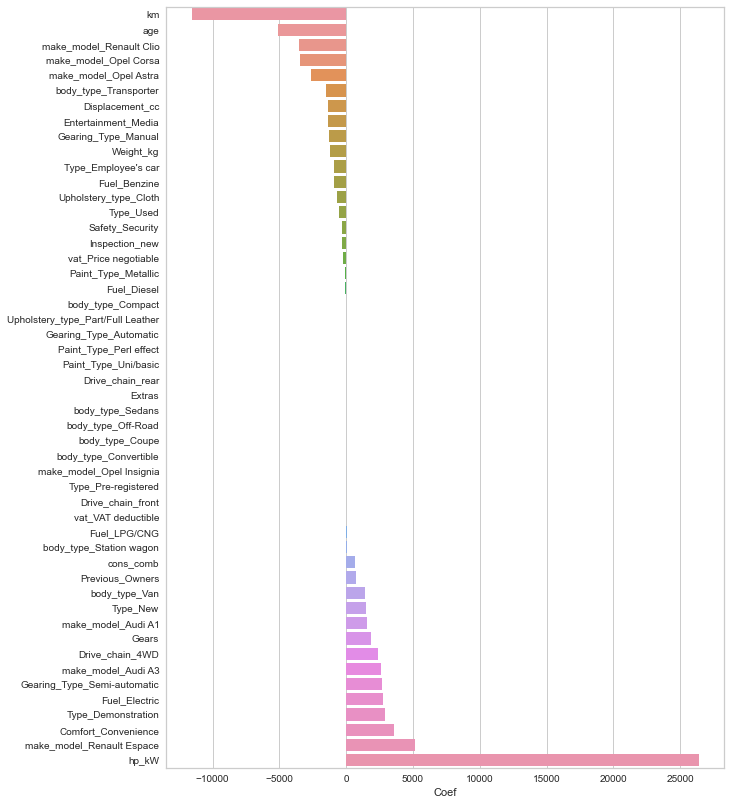

In [141]:
plt.figure(figsize=(10, 14))
sns.barplot(data=df_feat_imp, x=df_feat_imp.Coef, y=df_feat_imp.index);

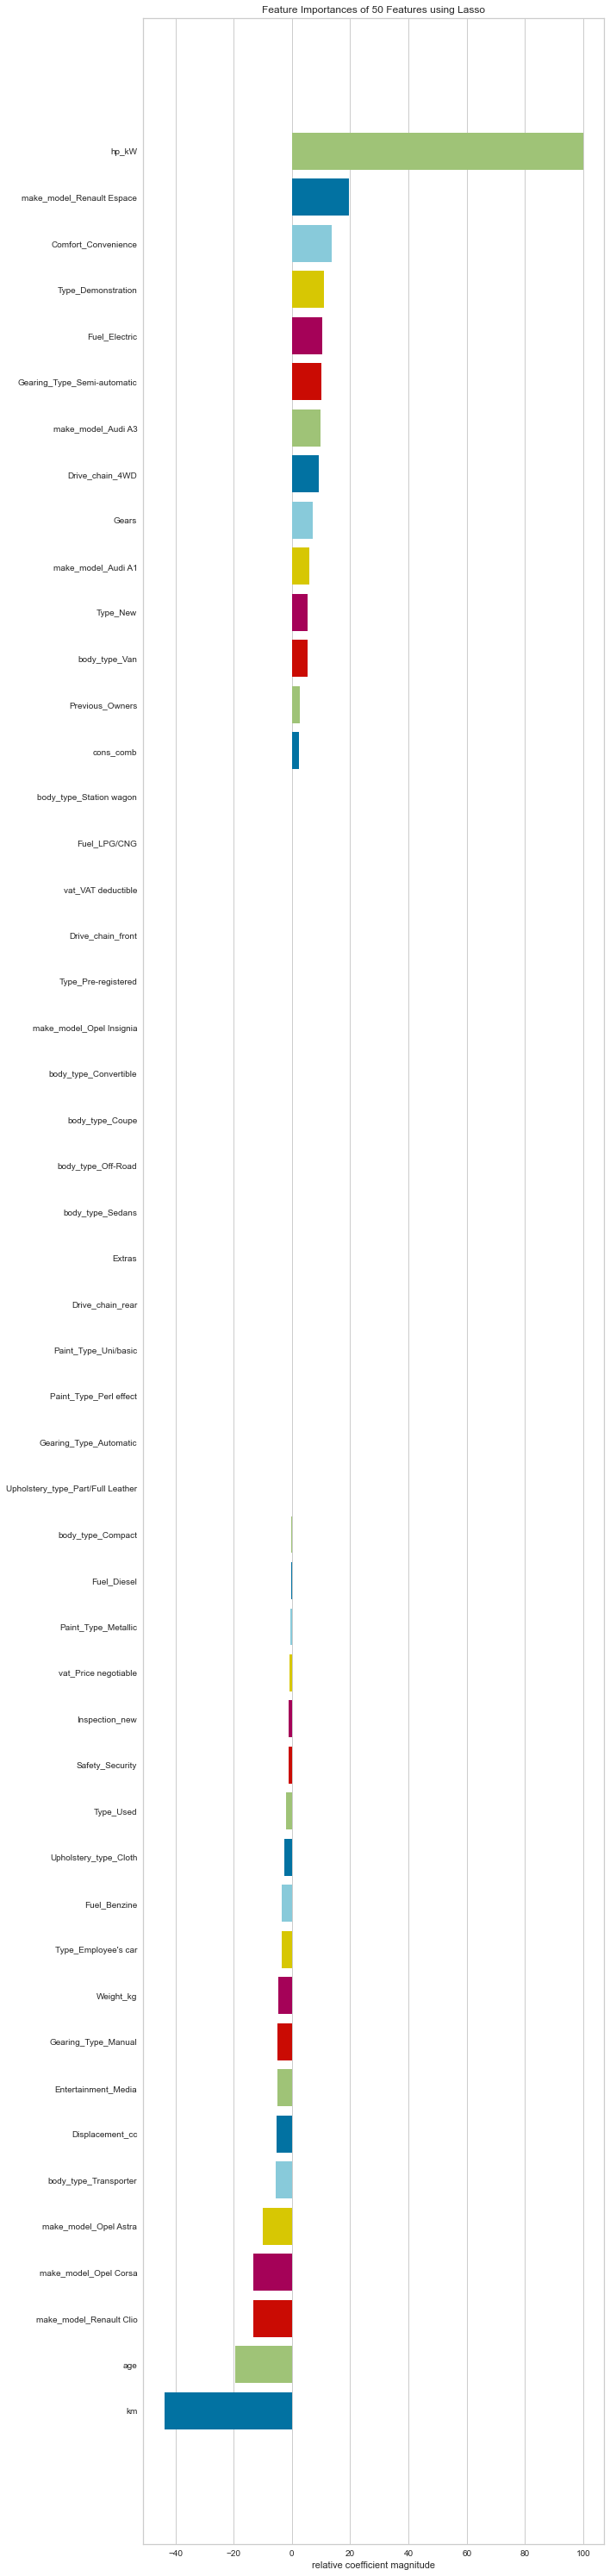

In [142]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = lasso_grid_model.best_estimator_["Lasso"]

viz = FeatureImportances(
    model,
    labels=lasso_grid_model.best_estimator_[
        "OneHot_Encoder"
    ].get_feature_names_out(),
)

visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show();

In [143]:
df_new = df[
    ["make_model", "hp_kW", "km", "age", "Comfort_Convenience", "Displacement_cc", "price"]
]

In [144]:
df_new

make_model   hp_kW        km   age  Comfort_Convenience  \
0             Audi A1  66.000 56013.000 3.000                   16   
1             Audi A1 141.000 80000.000 2.000                    9   
2             Audi A1  85.000 83450.000 3.000                   13   
3             Audi A1  66.000 73000.000 3.000                   16   
4             Audi A1  66.000 16200.000 3.000                   13   
...               ...     ...       ...   ...                  ...   
14216  Renault Espace 118.000   100.000 0.000                   27   
14217  Renault Espace 147.000  1647.363 0.000                   20   
14218  Renault Espace 165.000  1000.000 0.000                   26   
14219  Renault Espace 165.000  9900.000 0.000                   23   
14220  Renault Espace 146.000    15.000 0.000                   24   

       Displacement_cc  price  
0             1422.000  15770  
1             1798.000  14500  
2             1598.000  14640  
3             1422.000  14500  
4             1422.000  16790  
...                ...    ...  
14216         1598.000  39980  
14217         1997.000  39950  
14218         1798.000  39950  
14219         1798.000  39885  
14220         1997.000  39875  

[14221 rows x 7 columns]

In [145]:
X = df_new.drop(columns=["price"])
y = df_new.price

In [146]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [147]:
X_train.head()

make_model   hp_kW        km   age  Comfort_Convenience  \
14210  Renault Espace 165.000   500.000 0.000                   26   
10027   Opel Insignia 100.000 68116.000 3.000                   13   
318           Audi A1  70.000 56967.000 3.000                   13   
4098          Audi A3  85.000 21000.000 1.000                   17   
3344          Audi A3 110.000 26613.000 2.000                   16   

       Displacement_cc  
14210         1798.000  
10027         1598.000  
318            999.000  
4098          1598.000  
3344          1395.000

In [148]:
cat_onehot = ["make_model"]

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot),
    remainder="passthrough",
    verbose_feature_names_out=False,
)  # MinMaxScaler()

In [149]:
operations = [
    ("OneHot_Encoder", column_trans),
    ("scaler", MinMaxScaler()),
    ("Lasso", Lasso(alpha=0.001)),
]

lasso_final_model = Pipeline(steps=operations)

lasso_final_model.fit(X_train, y_train)
train_val(lasso_final_model, X_train, y_train, X_test, y_test)

train        test
R2         0.833       0.829
mae     2168.471    2160.936
mse  9202213.344 9364269.503
rmse    3033.515    3060.109

## Cross Validate

In [150]:
operations = [
    ("OneHot_Encoder", column_trans),
    ("scaler", MinMaxScaler()),
    ("Lasso", Lasso(alpha=0.001)),
]

model = Pipeline(steps=operations)

scores = cross_validate(
    model,
    X_train,
    y_train,
    scoring=[
        "r2",
        "neg_mean_absolute_error",
        "neg_mean_squared_error",
        "neg_root_mean_squared_error",
    ],
    cv=10,
    n_jobs=-1,
    return_train_score=True,
)

In [151]:
scores = pd.DataFrame(scores, index=range(1, 11))
scores.iloc[:, 2:].mean()

test_r2                                    0.833
train_r2                                   0.833
test_neg_mean_absolute_error           -2171.535
train_neg_mean_absolute_error          -2168.367
test_neg_mean_squared_error         -9235991.944
train_neg_mean_squared_error        -9200454.436
test_neg_root_mean_squared_error       -3035.657
train_neg_root_mean_squared_error      -3033.183
dtype: float64

In [152]:
3035 / df_new.price.mean()

0.1676108148127799

In [153]:
y_pred = lasso_final_model.predict(X_test)
fm_R2 = r2_score(y_test, y_pred)
fm_mae = mean_absolute_error(y_test, y_pred)
fm_rmse = mean_squared_error(y_test, y_pred, squared=False)

## Visually compare Models Performance in a graph

In [164]:
scores = {
    "linear_m": {"r2_score": lm_R2, "mae": lm_mae, "rmse": lm_rmse},
    "ridge_m": {"r2_score": rm_R2, "mae": rm_mae, "rmse": rm_rmse},
    "lasso_m": {"r2_score": lasm_R2, "mae": lasm_mae, "rmse": lasm_rmse},
    "elastic_m": {"r2_score": em_R2, "mae": em_mae, "rmse": em_rmse},
    "final_m": {"r2_score": fm_R2, "mae": fm_mae, "rmse": fm_rmse},
}
scores = pd.DataFrame(scores).T
scores

r2_score      mae     rmse
linear_m      0.868 1839.665 2683.374
ridge_m       0.869 1834.151 2679.621
lasso_m       0.869 1834.581 2679.533
elastic_m     0.869 1835.076 2679.759
final_m       0.829 2160.936 3060.109

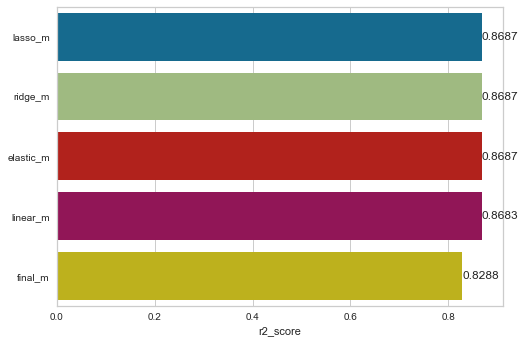

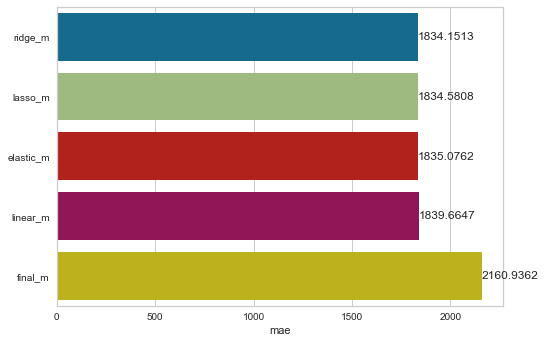

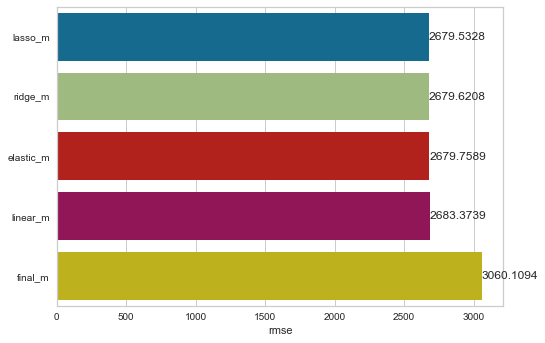

In [165]:
# metrics = scores.columns

for i, j in enumerate(scores):
    plt.figure(i)
    if j == "r2_score":
        ascending = False  # if our metric is r2_score the barplot will be sorted from largest to smallest
    else:
        ascending = True  # if our metric is mae or rmse then barplot will be sorted from smallest to largest
    compare = scores.sort_values(
        by=j, ascending=ascending
    )  # reorders compare df by corresponding metric
    ax = sns.barplot(
        x=compare[j], y=compare.index
    )  # The metric scores of compare[j] are drawn sequentially from compare df
    # and visualized in the barplot.
    # y=compare.index will write the model names on the y-axis of our image.
    ax.bar_label(
        ax.containers[0], fmt="%.4f"
    );  # annotate It is arranged as 4 digits from ".".

## Final model and Prediction new observation

In [166]:
X = df_new.drop(columns=["price"])
y = df_new.price

In [167]:
X.head()

make_model   hp_kW        km   age  Comfort_Convenience  Displacement_cc
0    Audi A1  66.000 56013.000 3.000                   16         1422.000
1    Audi A1 141.000 80000.000 2.000                    9         1798.000
2    Audi A1  85.000 83450.000 3.000                   13         1598.000
3    Audi A1  66.000 73000.000 3.000                   16         1422.000
4    Audi A1  66.000 16200.000 3.000                   13         1422.000

In [168]:
operations = [
    ("OneHot_Encoder", column_trans),
    ("scaler", MinMaxScaler()),
    ("Lasso", Lasso(alpha=0.001, max_iter=100000)),
]
final_model = Pipeline(steps=operations)

In [169]:
final_model.fit(X, y)

Pipeline(steps=[('OneHot_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('Lasso', Lasso(alpha=0.001, max_iter=100000))])

In [171]:
X

make_model   hp_kW        km   age  Comfort_Convenience  \
0             Audi A1  66.000 56013.000 3.000                   16   
1             Audi A1 141.000 80000.000 2.000                    9   
2             Audi A1  85.000 83450.000 3.000                   13   
3             Audi A1  66.000 73000.000 3.000                   16   
4             Audi A1  66.000 16200.000 3.000                   13   
...               ...     ...       ...   ...                  ...   
14216  Renault Espace 118.000   100.000 0.000                   27   
14217  Renault Espace 147.000  1647.363 0.000                   20   
14218  Renault Espace 165.000  1000.000 0.000                   26   
14219  Renault Espace 165.000  9900.000 0.000                   23   
14220  Renault Espace 146.000    15.000 0.000                   24   

       Displacement_cc  
0             1422.000  
1             1798.000  
2             1598.000  
3             1422.000  
4             1422.000  
...                ...  
14216         1598.000  
14217         1997.000  
14218         1798.000  
14219         1798.000  
14220         1997.000  

[14221 rows x 6 columns]

In [177]:
my_dict = {
    "make_model": "Audi A1",
    "hp_kW": 96,
    "km": 16000,
    "age": 2,
    "Comfort_Convenience": 10,
    "Displacement_cc": 1650,
}

In [178]:
X.head()

make_model   hp_kW        km   age  Comfort_Convenience  Displacement_cc
0    Audi A1  66.000 56013.000 3.000                   16         1422.000
1    Audi A1 141.000 80000.000 2.000                    9         1798.000
2    Audi A1  85.000 83450.000 3.000                   13         1598.000
3    Audi A1  66.000 73000.000 3.000                   16         1422.000
4    Audi A1  66.000 16200.000 3.000                   13         1422.000

In [179]:
new_obs = pd.DataFrame([my_dict])
new_obs

make_model  hp_kW     km  age  Comfort_Convenience  Displacement_cc
0    Audi A1     96  16000    2                   10             1650

In [180]:
final_model.predict(new_obs)

array([20316.32569039])

In [189]:
prediction = final_model.predict(new_obs)

In [192]:
print("The estimated value of your car is {} €. ".format(int(prediction[0])))

The estimated value of your car is 20316 €. 


## Dump model

In [196]:
import pickle

In [197]:
# Save model to disk
filename = 'my_final_model'
pickle.dump(final_model, open(filename, 'wb'))

## Streamlit

In [ ]:
!streamlit run my_app.py

In [ ]:
make_model.unique()


In [193]:
conda env list

# conda environments:
#
base                  *  /Applications/anaconda3
Clarusway                /Applications/anaconda3/envs/Clarusway
MLDPROJECT               /Applications/anaconda3/envs/MLDPROJECT
myenv                    /Applications/anaconda3/envs/myenv
                         /Users/rr/miniconda3


Note: you may need to restart the kernel to use updated packages.


In [194]:
pip list

Package                            Version
---------------------------------- -------------------
alabaster                          0.7.12
altair                             4.2.2
anaconda-client                    1.7.2
anaconda-navigator                 2.4.2
anaconda-project                   0.9.1
ansi2html                          1.8.0
anyio                              2.2.0
appdirs                            1.4.4
applaunchservices                  0.2.1
appnope                            0.1.2
appscript                          1.1.2
argh                               0.26.2
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
astroid                            2.5
astropy                            4.2.1
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              20.3.0
autopep8                           1.5.6
Babel                              2.9.0
backcall                           0.2.0

In [ ]:
pip install -r requirements.txt

In [ ]:
!streamlit run my_app.py

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___